# Task 1.1: All Data
---

---

# Explore XAI techniques on the Student’s Dropout Dataset

**Course:** Advanced Topics in Machine Learning

**Group:** DS2-G3
        
    Alexandre Sousa: 202206427
    Magda Costa: 202207036
    Rafael Pacheco: 202206258

---

---

# Index  <a name = "index"></a>
1. [Introduction](#intro)
2. [Brief Analysis](#ba)
3. [Pre-Modelling Techniques](#pmt)
    - [Exploratory Analysis and Visualization (EDA)](#pmt_eda)
        - [Class Balance](#pmt_eda_cb)
        - [Histograms and KDE - Distribution of numerical features](#"pmt_eda_h_kde")
        - [Bar Plots for Categorical/Binary Values](#pmt_eda_bp)
        - [Boxplots: Spreads and ](#pmt_eda_b)
        - [Correlation Matrix and Heatmap](#pmt_eda_cm_h)
    - [Principal Component Analysis (PCA)](#pmt_pca)
        - [Normal PCA](#pmt_pca_normal)
        - [Kernel PCA](#pmt_pca_kernel)
    - [t - distributed Stochastic Neighbot Embedding (t-SNE)](#pmt_tsne)
        - [Normal t-SNE](#pmt_tsne_normal)
        - [K-Means](#pmt_tsne_kmeans)
        - [t-SNE with Kernel PCA](#pmt_tsne_kernel_pca)
    - [Prototypes & Criticisms via MMD](#pmt_pc)
    - [Pre-Modelling Techniques - Conclusion](#pmt_c)

---

---

# Introduction <a name = "intro"></a>
[[go back to Index]](#index)

This project aims to explore insights from various Explainable Artificial Intelligence (XAI) techniques in a supervised learning context using the Students’ Dropout Dataset. This dataset was compiled from a higher education institution by integrating data from several independent databases. It contains information about students enrolled in a range of undergraduate programmes, including Agronomy, Design, Education, Nursing, Journalism, Management, and others.
This dataset is supported by the "SATDAP Programme – Capacitação da Administração Pública".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from IPython.display import display
from dataclasses import dataclass
from typing import List, Sequence
from sklearn.metrics.pairwise import pairwise_kernels
from scipy.stats import chi2_contingency

---

---

# Brief Analysis <a name = "ba"></a>
[[go back to Index]](#index)

Let us start by loading the dataset and superficially analyzing what we have and what we are dealing with.

In [2]:
#Load the dataset
data = pd.read_csv('data_all.csv', sep=';')

In [3]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print("Format (rows, columns):", data.shape)

Format (rows, columns): (4424, 37)


As you can see, the **dataset contains 4424 instances**, **each representing a student**. We have 37 parameters for each student that provide valuable information about them, including the Target, which **indicates whether the student** ``dropped out``, ``graduated``, or is ``still enrolled`` in the undergraduate program in the year they should have finished it.

Let us now take a general overview of the data we have:

In [5]:
"""
Creating a table that describes each column in the dataset. For every column, it shows:
- the column name,
- the data type,
- how many unique (non-missing) values it has,
- a small sample (up to five) of the distinct values in that column.
Then it displays that table, in order to quickly understand the structure and contents of your data.
"""

info = pd.DataFrame({
    "coluna": data.columns,
    "dtype": [data[c].dtype for c in data.columns],
    "n_unique": [data[c].nunique(dropna=True) for c in data.columns]
})
info["amostra_valores"] = [data[c].dropna().unique()[:5] for c in data.columns]
display(info)

,coluna,dtype,n_unique,amostra_valores
0,Marital status,int64,6,"[1, 2, 4, 3, 5]"
1,Application mode,int64,18,"[17, 15, 1, 39, 18]"
2,Application order,int64,8,"[5, 1, 2, 4, 3]"
3,Course,int64,17,"[171, 9254, 9070, 9773, 8014]"
4,Daytime/evening attendance\t,int64,2,"[1, 0]"
5,Previous qualification,int64,17,"[1, 19, 42, 39, 10]"
6,Previous qualification (grade),float64,101,"[122.0, 160.0, 100.0, 133.1, 142.0]"
7,Nacionality,int64,21,"[1, 62, 6, 41, 26]"
8,Mother's qualification,int64,29,"[19, 1, 37, 38, 3]"
9,Father's qualification,int64,34,"[12, 3, 37, 38, 1]"


In [6]:
"""
This command displays a statistical summary of the dataset.
"""

display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Through data analysis, it is evident that, as expected from the dataset description, the **data is already label-encoded**, with **some variables being binary** and taking values 1 or 0. In some cases, such as those involving **grades or rates**, the values are **floats**. The rest of the features are integers because they were label-encoded, except for the target, which is a string. Each student is classified as: ``Dropout``, ``Enrolled`` or ``Graduated``.

Note: The features related to grades were supposed to be integers between 0 and 20.

The dataset website states that there are no missing values, however, for data quality reasons, we should confirm if this is indeed the case.

In [7]:
"""
Greneration of a report showing the percentage of missing values for each column in the dataset, sorted from highest to lowest. 
It also counts how many rows are completely empty (i.e., contain missing values in all columns) and prints that number.
"""

null_pct = data.isna().mean().sort_values(ascending=False) * 100
missing_report = pd.DataFrame({"percent_missing": null_pct})
display(missing_report)


empty_rows = data.isna().all(axis=1).sum()
print(f"Empty Rows: {empty_rows}")

,percent_missing
Marital status,0.0
Application mode,0.0
Application order,0.0
Course,0.0
Daytime/evening attendance\t,0.0
Previous qualification,0.0
Previous qualification (grade),0.0
Nacionality,0.0
Mother's qualification,0.0
Father's qualification,0.0


Empty Rows: 0


As expected, there are no missing values, so we can now confirm if there are any duplicate entries.

In [8]:
"""
Lists columns that are constant (one or zero unique non-missing values).
Reports how many duplicate rows exist.
"""

# Columns with a one single unique value (Constant columns)
constant_cols = [c for c in data.columns if data[c].nunique(dropna=True) <= 1]
print("Constant Columns:", constant_cols)

# Duplicated rows
dup_rows = data.duplicated().sum()
print(f"Duplicated Instances: {dup_rows}")

Constant Columns: []
Duplicated Instances: 0


The dataset is already cleaned, so we have little to do. Nevertheless, we can perform label encoding on the Target variable to better analyze it. After that, we can start applying some pre-modelling techniques.

In [9]:
# mapping fixo (controlas os números atribuídos)
target_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}

# Aplicar o label-encoding do target
data['Target'] = data['Target'].map(target_mapping)

In [10]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [11]:
data.to_csv("data_all_preprocessed.csv", index=False)

-----------

---

# Pre-Modelling Techniques <a name = "pmt"></a>
[[go back to Index]](#index)

Explainable Artificial Intelligence (XAI) pre-modelling techniques play a vital role in ensuring that AI models are transparent, fair, and trustworthy from the very beginning of the development process. By applying these techniques before model training, it becomes possible to detect data biases, improve feature selection, and better understand the factors influencing predictions. This early integration of XAI helps build more reliable, ethical, and interpretable AI systems. In this section of the project, we will apply the following pre-modeling techniques:

- Exploratoty Analysis and Visualization
- PCA
- t-SNE
- Prototypes and Criticisms with MMD


---

## Exploratory Analysis and Visualization (EDA)  <a name = "pmt_eda"></a>
[[go back to Pre-Modelling Techniques]](#pmt)

Exploratory Data Analysis (EDA) and visualisation are essential steps in understanding and preparing data before building predictive models. They involve summarising key characteristics of the dataset, detecting patterns, relationships, and anomalies, and checking data quality through descriptive statistics and visual tools such as histograms, box plots, and correlation maps. EDA helps reveal insights, guide feature selection, and ensure that modelling decisions are based on a solid understanding of the underlying data.

    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Class Balance <a name = "pmt_eda_cb"></a>
[[go back to EDA]](#pmt_eda)

Let us start by analyzing the distribution of the target, since the dataset's authors mention a bias but do not specify what it is.

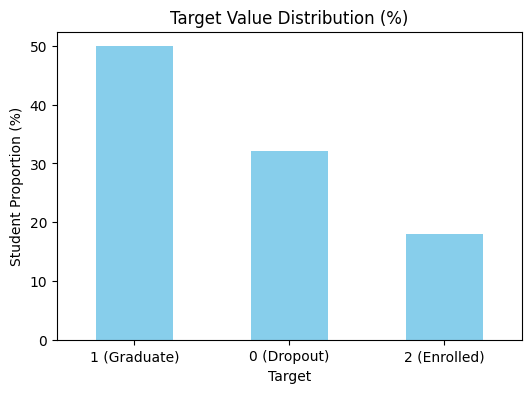

In [12]:
mapping = {0: '0 (Dropout)', 1: '1 (Graduate)', 2: '2 (Enrolled)'}
temp_target = data['Target'].map(mapping)

plt.figure(figsize=(6,4))
temp_target.value_counts(normalize=True).mul(100).plot.bar(color='skyblue')
plt.title("Target Value Distribution (%)")
plt.ylabel("Student Proportion (%)")
plt.xlabel("Target")
plt.xticks(rotation=0)
plt.show()

Around **half** of the students completed their studies within the expected time frame and were classified as **Graduate (1)**. However, around **30%** of students **dropped out** of the course, and **20%** have **not yet completed** their academic training. By this analysis we can conclude that the **data is clearly imbalanced**.

    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Histograms and KDE - Distribution of numerical features <a name = "pmt_eda_h_kde"></a>
[[go back to EDA]](#pmt_eda)

Histograms and Kernel Density Estimation (KDE) are key tools for understanding how data are distributed. Histograms show the frequency of values within defined intervals, helping to identify patterns such as skewness, peaks, or outliers. KDE provides a smooth curve that estimates the probability density of the data, offering a clearer view of its underlying shape. Together, they help reveal important characteristics of the dataset and guide decisions in data preprocessing and model selection.

These techniques rely on the concept of numeric distance, that is, the idea that values close to each other are similar, which makes them ideal for analysing continuous features. They should not be used for categorical variables because categories have no inherent numerical relationship or order. Using histograms or KDE on label-encoded categories would produce misleading results, as the numeric codes are arbitrary and do not represent real quantities or distances. For the same reasons the conjunction of histograms with KDE will not be used on binary features.

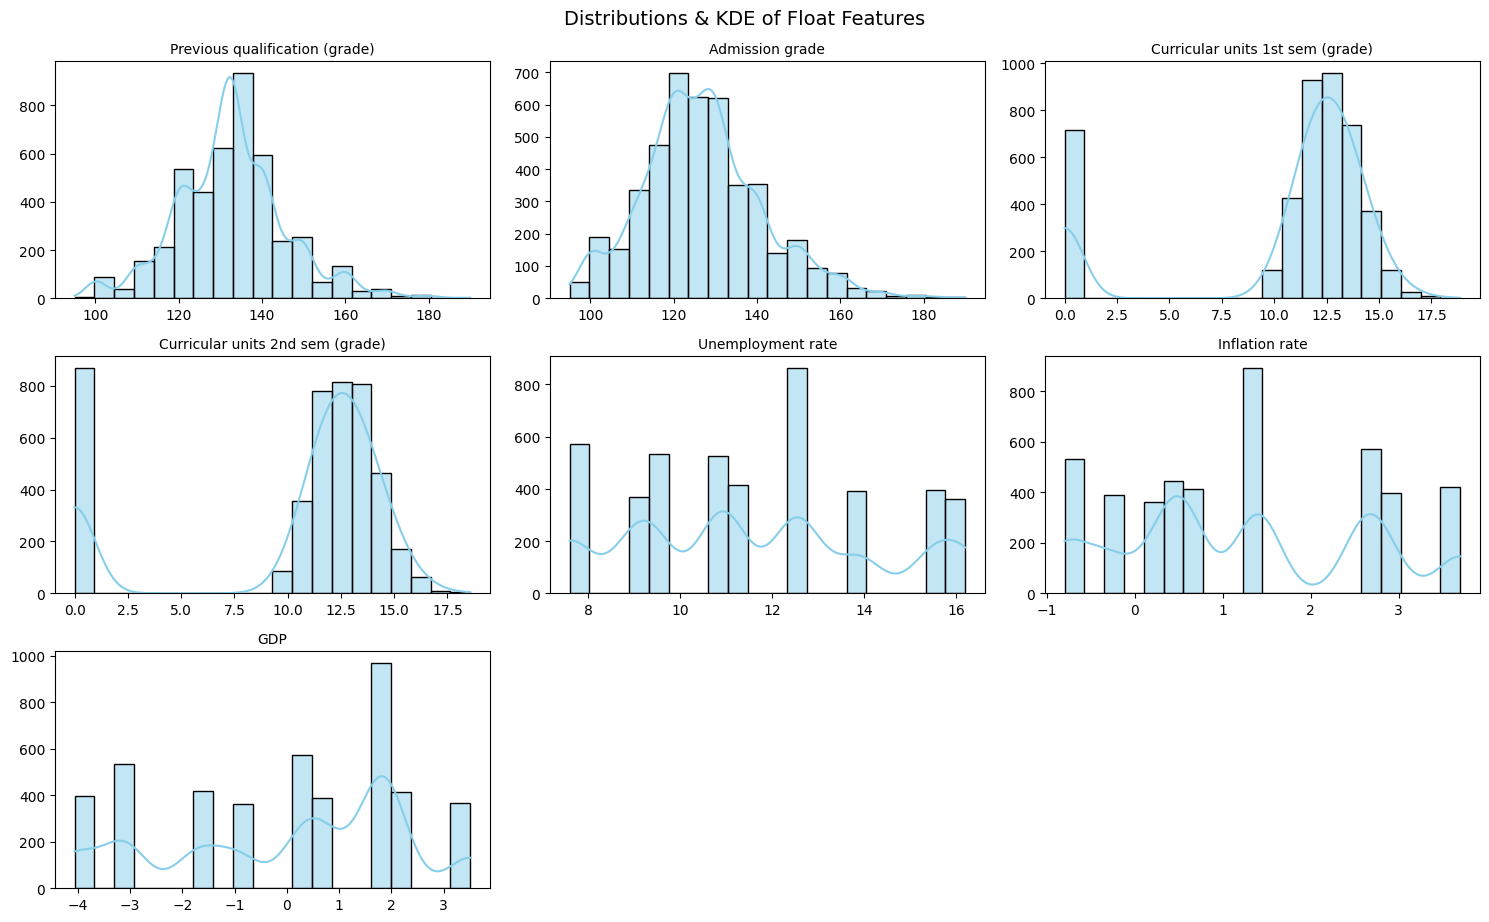

In [13]:
"""
This code identifies all continuous numerical features in the dataset
and plots their distributions using histograms with KDE curves.

It automatically arranges the plots in a grid of subplots for easier comparison.
This visualisation helps to understand the shape, spread, and skewness of the data,
as well as detect potential outliers or anomalies before modelling.

Note: Binary columns will be analysed later
"""

float_cols = data.select_dtypes(include=np.floating).columns

n = len(float_cols)
if n == 0:
    print("No float columns to plot.")
else:
    cols = 3
    rows = math.ceil(n / cols)

    plt.figure(figsize=(cols * 5, rows * 3))

    for i, col in enumerate(float_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(data[col], kde=True, bins=20, color='skyblue')
        plt.title(col, fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.suptitle("Distributions & KDE of Float Features", fontsize=14, y=1.02)
    plt.show()

To aid in the analysis of the graphs, we will group the values ​​into intervals based on quantiles.

In [14]:
"""
This code profiles each float feature by binning its values into quantile-based
intervals and summarising the distribution per bin.
"""

n_bins = 5  # ajuste conforme a granularidade desejada

for col in float_cols:
    categorias = pd.qcut(data[col], q=n_bins, duplicates="drop")
    vc = categorias.value_counts(dropna=False).sort_index()
    pct = categorias.value_counts(normalize=True, dropna=False).sort_index() * 100
    resumo = pd.concat([vc.rename("count"), pct.rename("percent")], axis=1)
    print(col)
    display(resumo.round({"percent": 2}))

Previous qualification (grade)


,count,percent
Previous qualification (grade),,
"(94.999, 122.0]",961,21.72
"(122.0, 130.0]",949,21.45
"(130.0, 133.1]",769,17.38
"(133.1, 141.0]",895,20.23
"(141.0, 190.0]",850,19.21


Admission grade


,count,percent
Admission grade,,
"(94.999, 115.8]",893,20.19
"(115.8, 122.3]",886,20.03
"(122.3, 129.48]",875,19.78
"(129.48, 138.3]",888,20.07
"(138.3, 190.0]",882,19.94


Curricular units 1st sem (grade)


,count,percent
Curricular units 1st sem (grade),,
"(-0.001, 10.5]",892,20.16
"(10.5, 11.857]",883,19.96
"(11.857, 12.667]",891,20.14
"(12.667, 13.625]",874,19.76
"(13.625, 18.875]",884,19.98


Curricular units 2nd sem (grade)


,count,percent
Curricular units 2nd sem (grade),,
"(-0.001, 10.0]",947,21.41
"(10.0, 11.75]",847,19.15
"(11.75, 12.667]",898,20.30
"(12.667, 13.667]",881,19.91
"(13.667, 18.571]",851,19.24


Unemployment rate


,count,percent
Unemployment rate,,
"(7.598999999999999, 8.9]",939,21.23
"(8.9, 10.8]",1058,23.92
"(10.8, 12.4]",859,19.42
"(12.4, 13.9]",809,18.29
"(13.9, 16.2]",759,17.16


Inflation rate


,count,percent
Inflation rate,,
"(-0.801, -0.3]",923,20.86
"(-0.3, 0.6]",1221,27.60
"(0.6, 1.4]",893,20.19
"(1.4, 2.6]",571,12.91
"(2.6, 3.7]",816,18.44


GDP


,count,percent
GDP,,
"(-4.061, -3.12]",930,21.02
"(-3.12, 0.32]",1352,30.56
"(0.32, 0.79]",390,8.82
"(0.79, 1.79]",970,21.93
"(1.79, 3.51]",782,17.68


The analysis of these data provides some insights into the students included in this dataset, for example:
- Previous Qualification (grade): This suggests an almost normal distribution centred around 130–140, with a slight right skew. This indicates that most students in the dataset completed their previous qualification with an average grade between 120 and 140, with more students achieving lower grades than higher ones.
- Admission Grade: The results are very similar to those for Previous Qualification. The main difference is that the centre of the histogram appears even more skewed.
- Curricular units 1st sem (grade): There is a clear (slightly) bimodal distribution, with one peak close to 0 and another around 12–13. This suggests a large group of students failing, alongside another group achieving passing grades around 12 and 13, with very few students scoring above 17.
- Curricular units 2nd sem (grade): Similar to Curricular units 1st sem (grade).
- "Unemployment rate", "Inflation rate" and "GDP": These variables indicate that the dataset is not homogeneous over time. It includes students from different years with noticeably different economic contexts. This enables an analysis of how external economic conditions may influence academic performance.

    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Bar Plots for Categorical/Binary Values <a name = "pmt_eda_bp"></a>
[[go back to EDA]](#pmt_eda)

Bar plots are graphical representations used to display and compare the frequency, count, or proportion of different categories. Each bar represents a distinct category, and its height corresponds to the number of observations in that category. They are especially useful for analysing categorical or discrete data, helping to identify dominant groups, class imbalances, and patterns within qualitative features. Bar plots make it easy to interpret differences between categories and to communicate insights about the composition of a dataset.

C:\Users\magda.costa\AppData\Local\Temp\ipykernel_21004\3457675171.py:36: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0.0, 0.0, 1.0, 0.96])
c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


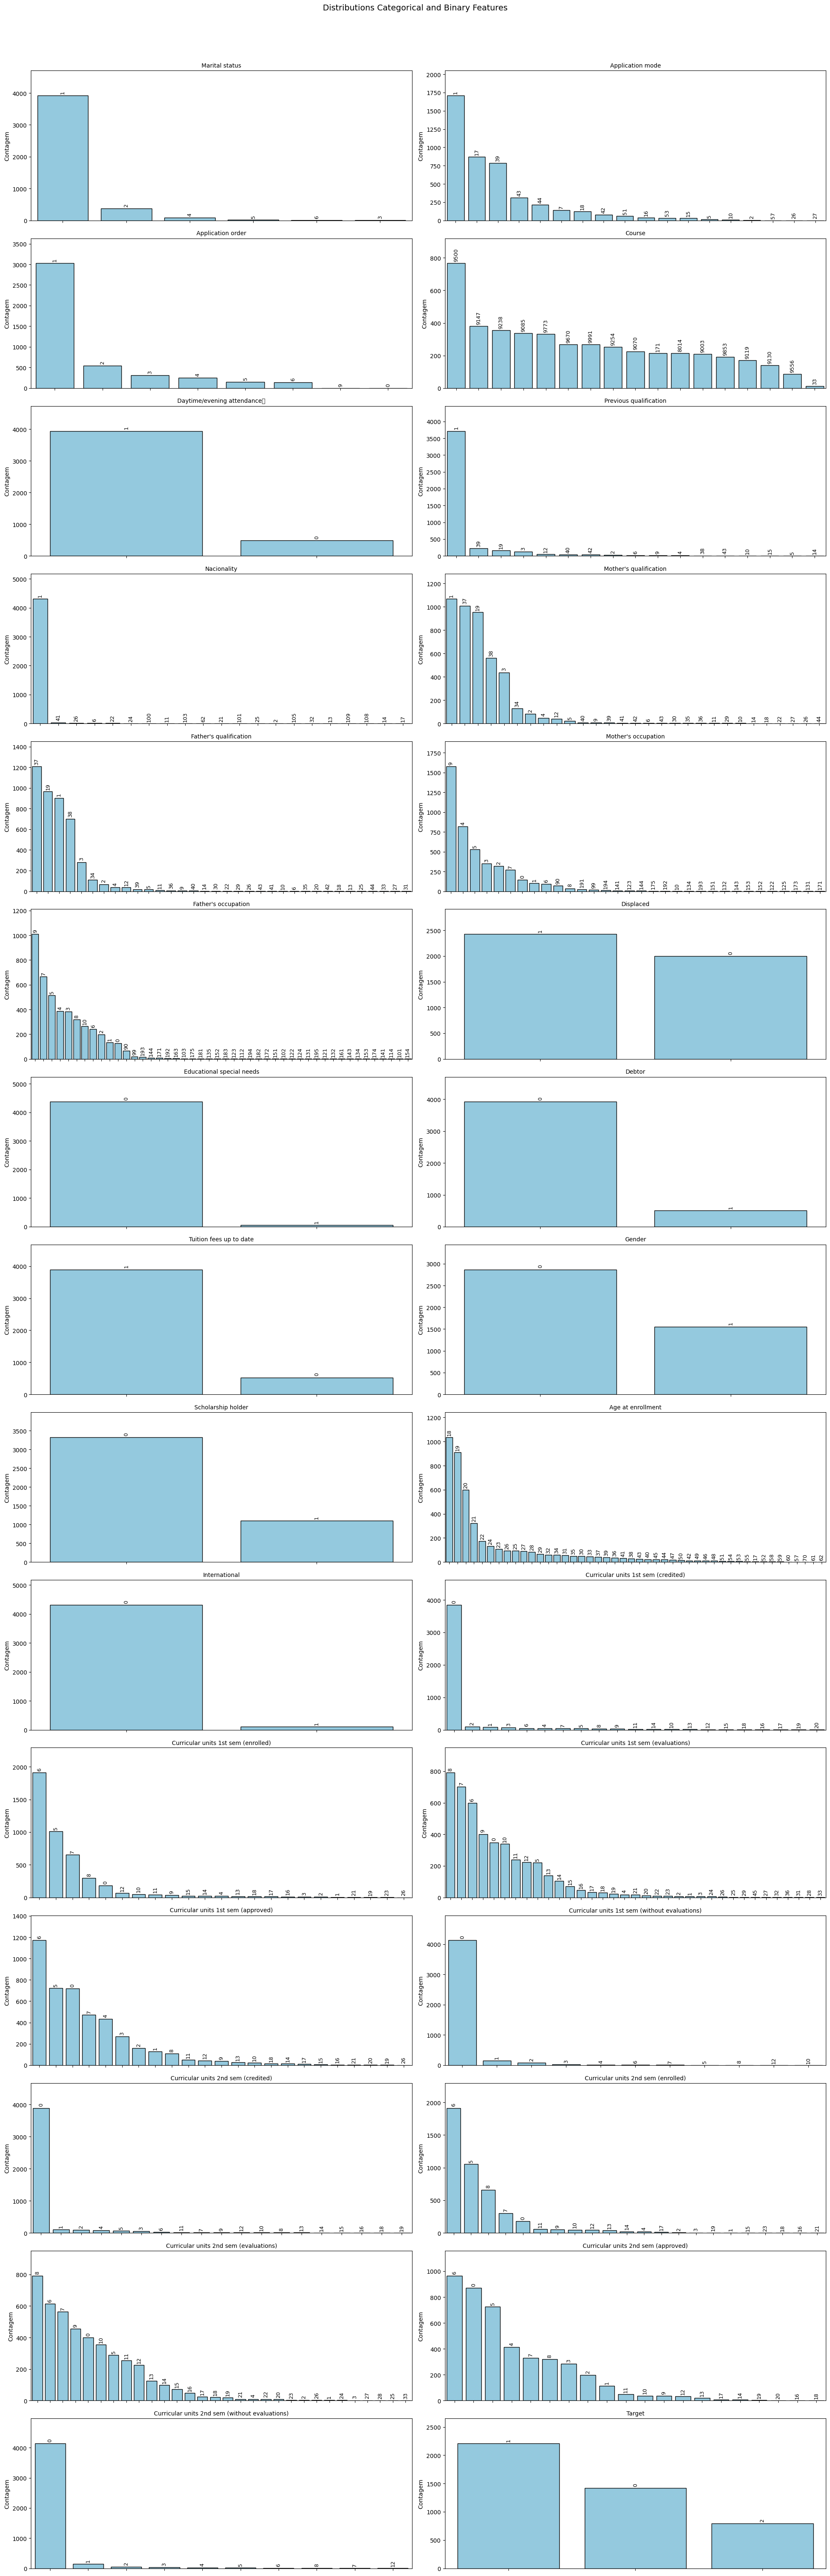

In [15]:
"""
This code selects all integer (int) features from the dataset and visualises
their distributions using bar plots.
"""

int_cols = data.select_dtypes(include=[np.integer]).columns.tolist()

n = len(int_cols)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 10, rows * 4.2))

for i, col in enumerate(int_cols, 1):
    ax = plt.subplot(rows, cols, i)

    order = data[col].value_counts(dropna=False).index
    sns.countplot(data=data, x=col, order=order, color="skyblue", edgecolor="black", ax=ax)

    ax.set_title(col, fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("Contagem")

    # labels no topo, em vertical
    labels = [t.get_text() for t in ax.get_xticklabels()]
    max_h = 0
    for p, lbl in zip(ax.patches, labels):
        h = p.get_height()
        max_h = max(max_h, h)
        ax.annotate(str(lbl), (p.get_x() + p.get_width()/2, h),
                    ha="center", va="bottom", fontsize=9, rotation=90,
                    xytext=(0, 3), textcoords="offset points")
    ax.set_ylim(0, max_h * 1.20 if max_h > 0 else 1)
    ax.set_xticklabels([])

plt.tight_layout(rect=[0.0, 0.0, 1.0, 0.96])
plt.suptitle("Distributions Categorical and Binary Features", fontsize=14, y=0.98)
plt.show()

By analyzing the graphs, it is possible to see that **there are variables with poor distributions**, that is, almost all of them are concentrated on a single label, such as:
- Previous qualification
- Nacionality
- Educational special needs
- International
- Curricular units 1st sem (credited)
- Curricular units 1st sem (without evaluations)
- Curricular units 2nd sem (credited)
- Curricular units 2nd sem (without evaluations)

The fact that these features have little variability may make them less relevant to the model or to predicting our target. Let us analyze these variables in more detail to understand their importance. To do this, we must understand how many labels each feature has and what their percentages are.

In [16]:
"""
This code selects a specific subset of columns and returns, for each one,
the number of distinct values it contains, counting NaN as a distinct category.
"""

cols = ["Nacionality","Educational special needs", "International", "Curricular units 1st sem (credited)", "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (without evaluations)", "Previous qualification"]
data[cols].nunique(dropna=False)

Nacionality                                       21
Educational special needs                          2
International                                      2
Curricular units 1st sem (credited)               21
Curricular units 1st sem (without evaluations)    11
Curricular units 2nd sem (credited)               19
Curricular units 2nd sem (without evaluations)    10
Previous qualification                            17
dtype: int64

In [17]:
"""
This code analyses two binary features — 'Educational special needs' and 'International' —
and calculates how often each label (e.g., 0/1 or Yes/No) appears in the dataset.
"""

binary_cols = ['Educational special needs', 'International']

counts = (
    data[binary_cols].apply(lambda s: s.value_counts(dropna=False)).fillna(0).astype(int)
)

print(counts)
print(counts / len(data) * 100)

   Educational special needs  International
0                       4373           4314
1                         51            110
   Educational special needs  International
0                  98.847197      97.513562
1                   1.152803       2.486438


In [18]:
"""
For each column in `cols`, this code summarises the distribution of its labels,
with the columns ordered by label from left to right by descending Count (most frequent first).
"""

for c in cols:
    # contagens e percentagens por label (inclui NaN)
    vc  = data[c].value_counts(dropna=False)
    pct = data[c].value_counts(normalize=True, dropna=False).mul(100).round(2)

    # ordem das colunas: labels ordenados por Count decrescente
    order = vc.sort_values(ascending=False).index.tolist()

    # tabela com linhas = Count / Percent e colunas = labels na ordem pedida
    resumo = pd.DataFrame(
        [vc.reindex(order), pct.reindex(order)],
        index=["Count", "Percent"]
    ).rename(columns={np.nan: "NaN"})

    print(f"\n=== {c} ===")
    display(resumo)


=== Nacionality ===


Nacionality,1,41,26,6,22,24,100,11,103,62,...,101,25,2,105,32,13,109,108,14,17
Count,4314.00,38.00,14.00,13.00,13.00,5.00,3.00,3.00,3.00,2.00,...,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00
Percent,97.51,0.86,0.32,0.29,0.29,0.11,0.07,0.07,0.07,0.05,...,0.05,0.05,0.05,0.05,0.02,0.02,0.02,0.02,0.02,0.02



=== Educational special needs ===


Educational special needs,0,1
Count,4373.00,51.00
Percent,98.85,1.15



=== International ===


International,0,1
Count,4314.00,110.00
Percent,97.51,2.49



=== Curricular units 1st sem (credited) ===


Curricular units 1st sem (credited),0,2,1,3,6,4,7,5,8,9,...,14,10,13,12,15,18,16,17,19,20
Count,3847.00,94.00,85.00,69.00,51.00,47.00,41.00,41.00,31.0,27.00,...,15.00,15.00,13.00,12.00,5.00,4.00,3.00,3.00,2.00,2.00
Percent,86.96,2.12,1.92,1.56,1.15,1.06,0.93,0.93,0.7,0.61,...,0.34,0.34,0.29,0.27,0.11,0.09,0.07,0.07,0.05,0.05



=== Curricular units 1st sem (without evaluations) ===


Curricular units 1st sem (without evaluations),0,1,2,3,4,6,7,5,8,12,10
Count,4130.00,153.00,79.00,23.00,15.00,6.00,6.00,5.00,4.00,2.00,1.00
Percent,93.35,3.46,1.79,0.52,0.34,0.14,0.14,0.11,0.09,0.05,0.02



=== Curricular units 2nd sem (credited) ===


Curricular units 2nd sem (credited),0,1,2,4,5,3,6,11,7,9,12,10,8,13,14,15,16,18,19
Count,3894.00,107.00,92.00,78.00,68.00,49.00,26.00,20.00,16.00,15.00,14.00,13.00,12.00,9.0,4.00,2.00,2.00,2.00,1.00
Percent,88.02,2.42,2.08,1.76,1.54,1.11,0.59,0.45,0.36,0.34,0.32,0.29,0.27,0.2,0.09,0.05,0.05,0.05,0.02



=== Curricular units 2nd sem (without evaluations) ===


Curricular units 2nd sem (without evaluations),0,1,2,3,4,5,6,8,7,12
Count,4142.00,140.00,48.00,35.00,21.00,17.00,8.00,6.00,5.00,2.00
Percent,93.63,3.16,1.08,0.79,0.47,0.38,0.18,0.14,0.11,0.05



=== Previous qualification ===


Previous qualification,1,39,19,3,12,40,42,2,6,9,4,38,43,10,15,5,14
Count,3717.00,219.00,162.00,126.00,45.00,40.0,36.00,23.00,16.00,11.00,8.00,7.00,6.00,4.00,2.00,1.00,1.00
Percent,84.02,4.95,3.66,2.85,1.02,0.9,0.81,0.52,0.36,0.25,0.18,0.16,0.14,0.09,0.05,0.02,0.02


Although these variables have little variability, if we analyze them in terms of what they represent, they may have more meaning than they appear to. For now, we will leave them in the dataset.

    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Boxplots: Spreads and Outliers <a name = "pmt_eda_b"></a>
[[go back to EDA]](#pmt_eda)

Boxplots are powerful visual tools for summarising and comparing the distributions of numerical data. They display key statistical measures, such as the median, quartiles, and potential outliers, in a simple, compact format.
By highlighting the spread and symmetry of the data, boxplots make it easy to detect skewness, variability, and extreme values that could influence model performance. They are especially useful for comparing multiple variables or groups side by side, helping identify differences in scale or patterns that may require further preprocessing or normalisation before modelling.

Categorical variables, however, consist of distinct groups or labels (such as Yes/No or A/B/C) that have no inherent numerical relationship or order. Since there is no concept of distance or magnitude between categories, a boxplot cannot meaningfully represent their distribution

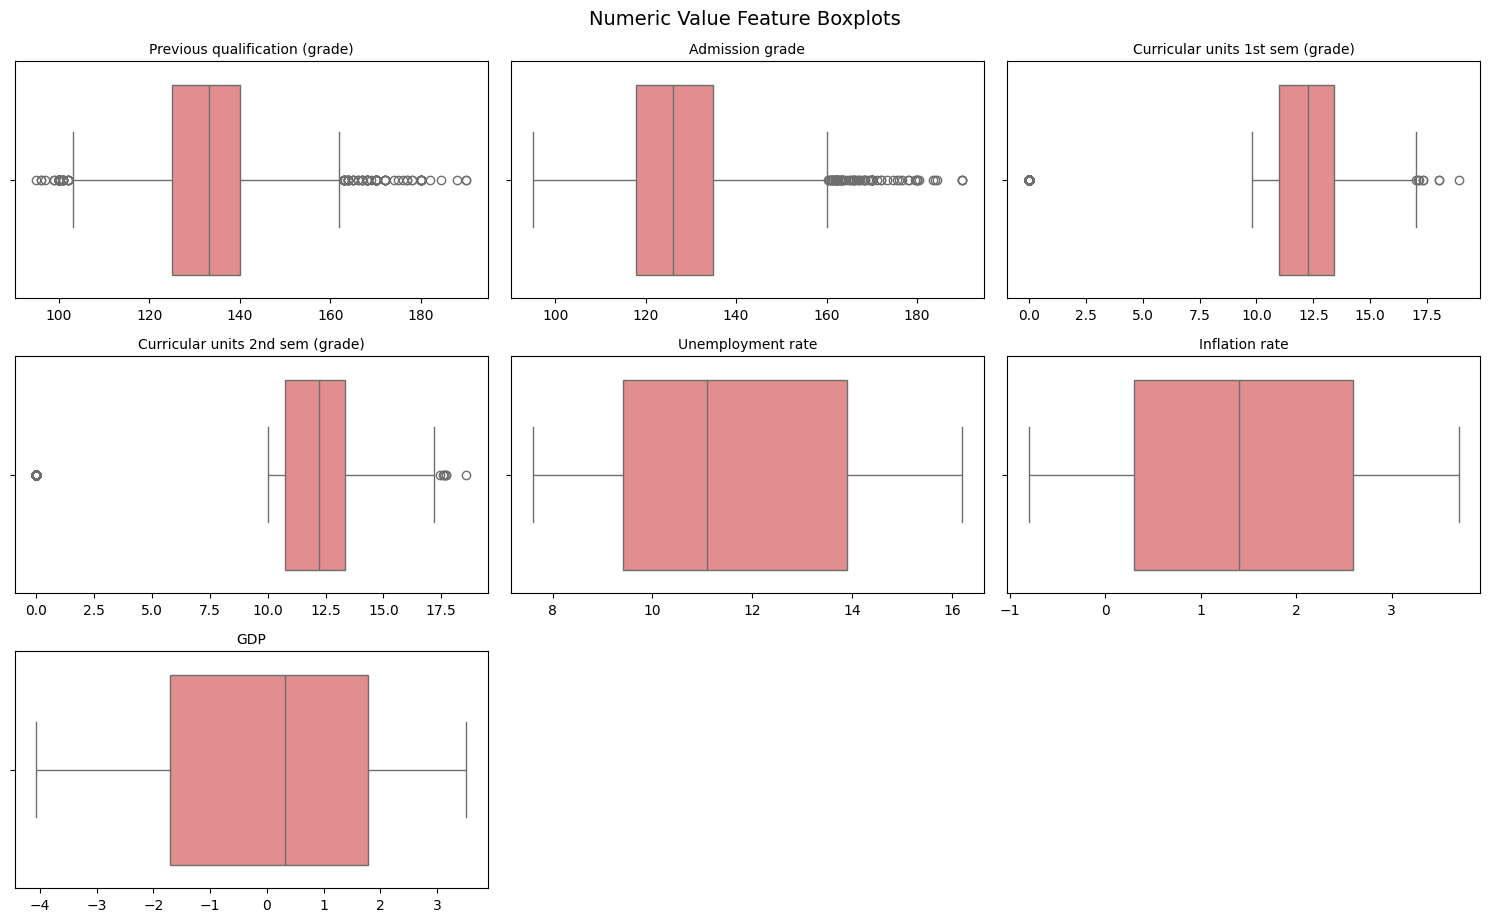

In [19]:
"""
This code selects all numerical columns and visualises each one with a box plot.
"""

cols = 3
rows = math.ceil(len(float_cols) / cols)


plt.figure(figsize=(cols*5, rows*3))

for i, col in enumerate(float_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("Numeric Value Feature Boxplots", fontsize=14, y=1.02)
plt.show()

The conclusions drawn from the boxplots are very similar to those drawn from the KDE histograms.

    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Correlation Matrix and Heatmap <a name = "pmt_eda_cm_h"></a>
[[go back to EDA]](#pmt_eda)

A correlation matrix is a statistical tool that measures the strength and direction of relationships between numerical variables. It helps identify how changes in one variable are associated with changes in another, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation).

The heatmap is a visual representation of this matrix, where colour intensity highlights the magnitude of correlations. This makes it easy to spot patterns, redundant features, and potential multicollinearity between variables.

Together, the correlation matrix and heatmap are essential for understanding data structure, selecting relevant features, and avoiding issues in modelling caused by highly correlated variables.

We decided to use Pearson’s correlation for the truly numerical variables and Cramér’s V for the remaining variables, which are numerically encoded but not genuinely metric. This choice is driven by the different assumptions behind each measure and by the need to respect the scale and meaning of each type of variable.

Pearson’s correlation is appropriate for variables measured on an interval or ratio scale, where differences and averages are meaningful (e.g. age, income, grades, number of credits). It quantifies the strength of a linear relationship between two numerical variables and assumes that the underlying scale is metric: the difference between 1 and 2 has the same meaning as between 10 and 11. For this reason, it is well suited to the variables in the dataset that are inherently numerical and where linear trends are interpretable.

In contrast, several variables in the dataset are categorical in nature, even if they appear as numbers due to encoding (label encoding of categories). For these variables, the numeric codes do not represent a true metric scale: the fact that one category is coded as “2” and another as “3” does not imply that “3” is greater than “2” in any meaningful quantitative sense, nor that the distance between categories is interpretable. Applying Pearson’s correlation in this context would be misleading, because the result would depend on arbitrary coding choices rather than on real structure in the data.

To avoid this, we use Cramér’s V for the non-numeric (or only artificially numeric) variables. Cramér’s V is a measure of association between categorical variables, derived from the chi-squared statistic of a contingency table. It does not assume any ordering or metric structure on the categories and is therefore much more appropriate for nominal or ordinal variables encoded as labels. By combining Pearson’s correlation for genuinely numerical variables with Cramér’s V for the categorical ones, the analysis respects the nature of each variable type and avoids introducing artificial relationships that result only from the encoding scheme rather than from the underlying data.

**Step 01: Divide the features**

Let's first separate the features into two major groups: 

- Numerical features with linearity: This includes continous features and features that were not previously label encoded to be numeric, when they act as categorical. 

- Numerical features wint non-linearity: All the features that were label encoded. We'll include here the binary features also.

In [20]:
numeric_cols = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
]

categorical_cols = [
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Marital status',
    'Application order',
    'Daytime/evening attendance\t',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International',
    'Target',
]

print("Numeric (Pearson):", numeric_cols)
print("Categorical (Cramér's V):", categorical_cols)

Numeric (Pearson): ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Categorical (Cramér's V): ['Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Marital status', 'Application order', 'Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship h

**Step 02: Use Person Correlation to Numerical features with linearity**

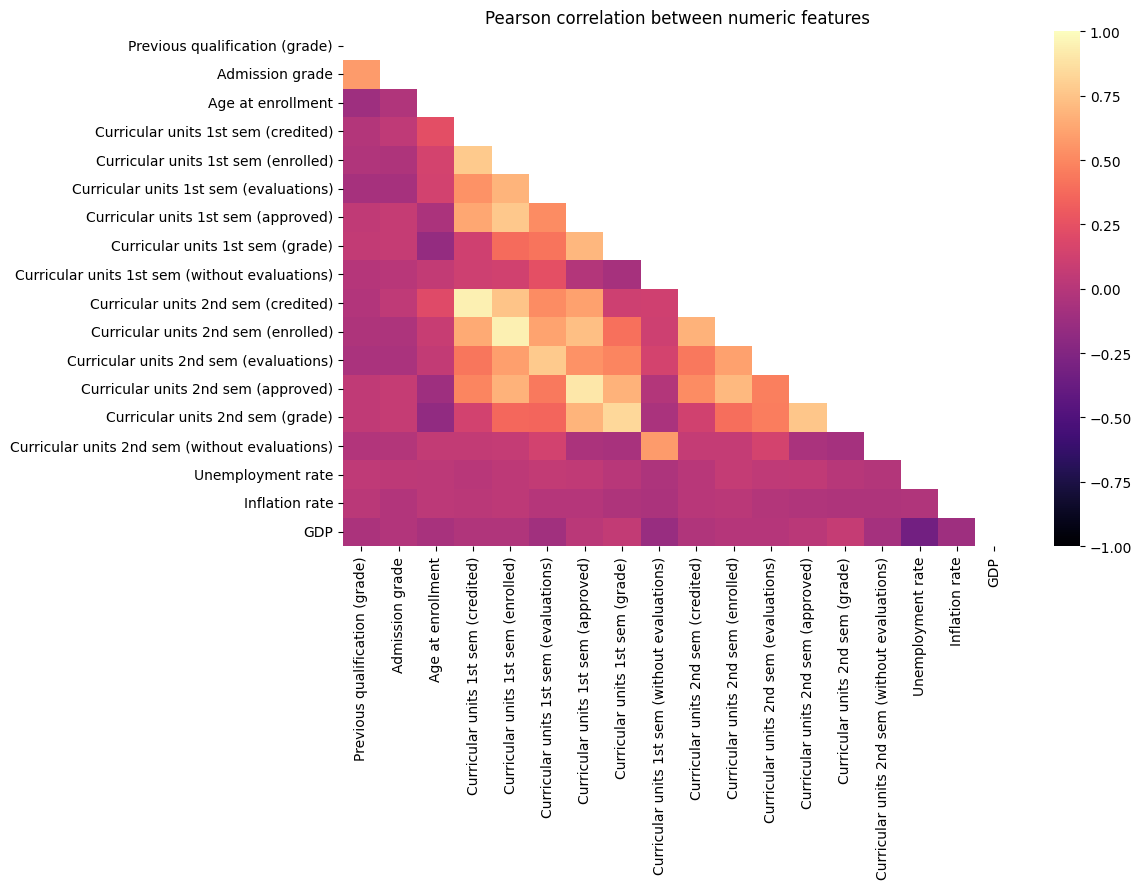

In [21]:
# Matriz de correlação de Pearson entre variáveis numéricas
num = data[numeric_cols]
pearson_mat = num.corr(method="pearson")

mask = np.triu(np.ones_like(pearson_mat, dtype=bool))

plt.figure(figsize=(12, 9))
sns.heatmap(
    pearson_mat,
    mask=mask,
    cmap="magma",
    vmin=-1,
    vmax=1,
    annot=False  # põe True se quiseres ver os valores
)
plt.title("Pearson correlation between numeric features")
plt.tight_layout()
plt.show()

In [22]:
threshold = 0.85

# filtrar pares acima do limiar
threshold = 0.85
for col in pearson_mat.columns:
    for row in pearson_mat.index:
        val = pearson_mat.loc[row, col]
        if row != col and val > threshold:
            print(f"{row} ↔ {col}: {val:.2f}")

Curricular units 2nd sem (credited) ↔ Curricular units 1st sem (credited): 0.94
Curricular units 2nd sem (enrolled) ↔ Curricular units 1st sem (enrolled): 0.94
Curricular units 2nd sem (approved) ↔ Curricular units 1st sem (approved): 0.90
Curricular units 1st sem (credited) ↔ Curricular units 2nd sem (credited): 0.94
Curricular units 1st sem (enrolled) ↔ Curricular units 2nd sem (enrolled): 0.94
Curricular units 1st sem (approved) ↔ Curricular units 2nd sem (approved): 0.90


| Variable 1                                   | Variable 2                                   | Correlation |
|----------------------------------------------|----------------------------------------------|--------------|
| Curricular units 2nd sem (credited)           | Curricular units 1st sem (credited)           | 0.94         |
| Curricular units 2nd sem (enrolled)           | Curricular units 1st sem (enrolled)           | 0.94         |
| Curricular units 2nd sem (approved)           | Curricular units 1st sem (approved)           | 0.90         |
| Curricular units 1st sem (credited)           | Curricular units 2nd sem (credited)           | 0.94         |
| Curricular units 1st sem (enrolled)           | Curricular units 2nd sem (enrolled)           | 0.94         |
| Curricular units 1st sem (approved)           | Curricular units 2nd sem (approved)           | 0.90         |


The correlation map reveals strong relationships between several academic variables, particularly between metrics from the first and second semesters (such as assessments, passed units, credits, and grades). This is expected, as academic performance tends to remain relatively stable throughout the year: students who perform well in the first semester are likely to achieve similarly strong results in the second. This reflects consistent study habits, underlying competencies, and curricular continuity. These high correlations also indicate natural redundancy (multicollinearity) between variables that essentially measure the same phenomenon at different points in time. This means that including all these variables in a model may be redundant.

> **See correlation with the target**

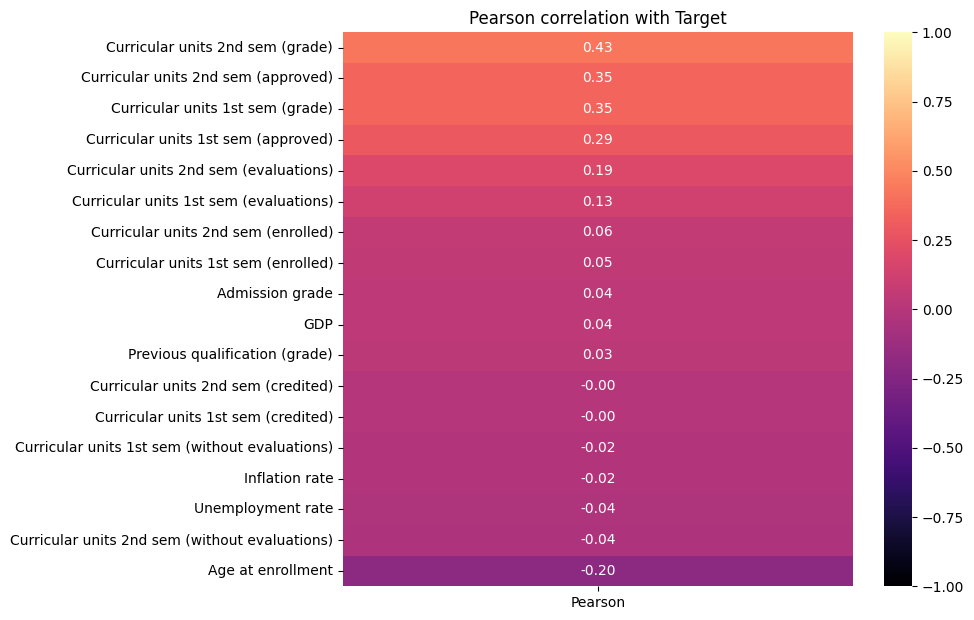

In [23]:
"""
Distance correlation entre cada feature numérica e o target.
"""
target_col = "Target"

# Usa só as features numéricas que queres (ex.: numeric_cols) + Target
num = data[numeric_cols + [target_col]]

# Correlação de Pearson de cada feature com o target (point-biserial)
target_pearson = (
    num.drop(columns=[target_col])
       .corrwith(num[target_col])
       .sort_values(ascending=False)
)

corr_target_only = target_pearson.to_frame(name="Pearson")

plt.figure(figsize=(10, max(3, len(corr_target_only)*0.35)))
sns.heatmap(
    corr_target_only,
    cmap="magma",
    center=0,
    annot=True,
    fmt=".2f",
    cbar=True,
    vmin=-1,
    vmax=1,
)
plt.title(f"Pearson correlation with {target_col}")
plt.tight_layout()
plt.show()

The variables with the highest positive correlation with the Target are:
- Curricular units 2nd semester (grade) (≈ 0.43)
- Curricular units 2nd semester (approved) (≈ 0.35)
- Curricular units 1st semester (grade) (≈ 0.35)
- Curricular units 1st semester (approved) (≈ 0.29)

This indicates that academic performance (grades and approved units) is strongly associated with the student's outcome (Dropout, Enrolled, Graduate): the better the performance, the more likely graduation, and the worse the performance, the greater the risk of dropping out.

Moderate negative correlations:
- Age at enrollment (-0.20)

This suggests that certain age ranges may favor or hinder the completion of studies.

Macroeconomic variables (GDP, Inflation rate, Unemployment rate) show very weak correlation with the others and with the target, **suggesting that they act independently**. There feature are **the macroeconomic situation of Portugal in that enrollment year**.

**Step 03: Cormers' V to Numerical features that were previously label encoded**

c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


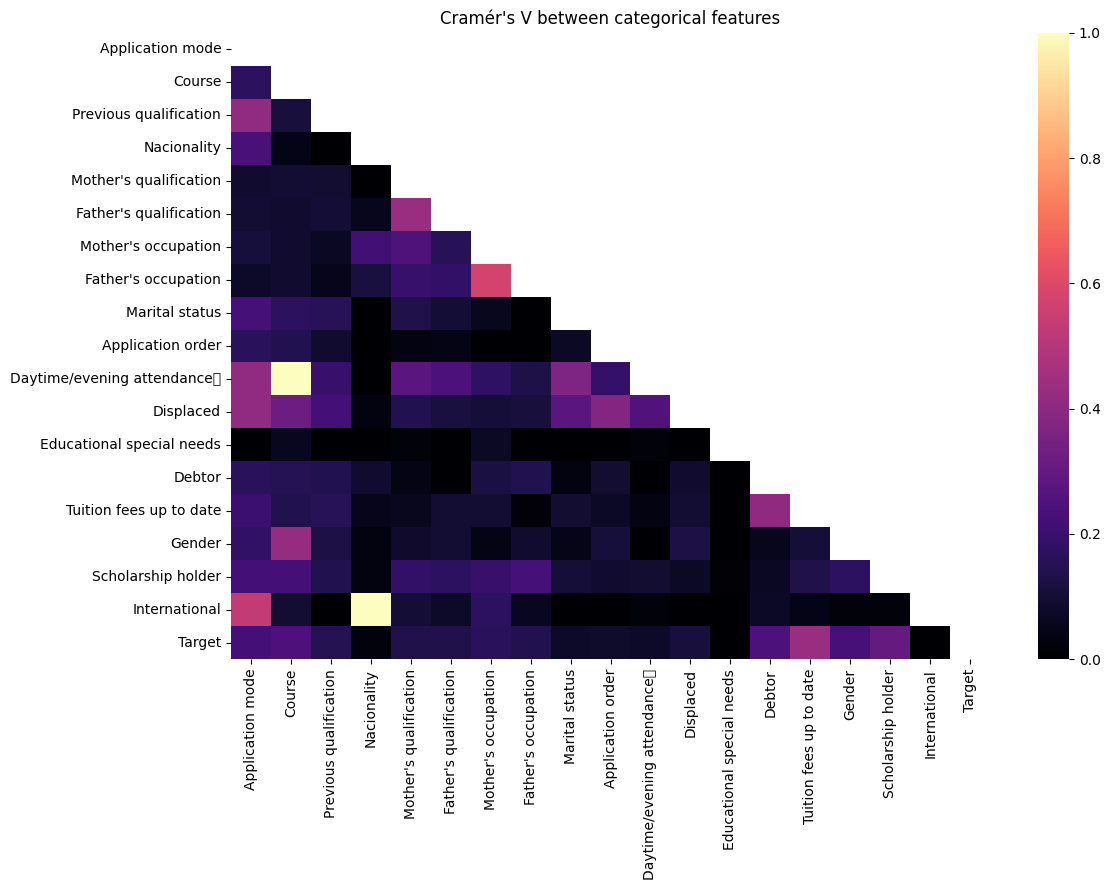

In [24]:
def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion)
    n = confusion.to_numpy().sum()

    phi2 = chi2 / n
    r, k = confusion.shape

    # correção de viés (Bergsma 2013)
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    r_corr = r - ((r - 1)**2)/(n - 1)
    k_corr = k - ((k - 1)**2)/(n - 1)

    denom = min((k_corr - 1), (r_corr - 1))
    if denom <= 0:
        return 0.0

    return np.sqrt(phi2_corr / denom)

def cramers_v_matrix(df, cat_cols):
    m = len(cat_cols)
    res = pd.DataFrame(np.ones((m, m)), index=cat_cols, columns=cat_cols)
    for i in range(m):
        for j in range(i + 1, m):
            v = cramers_v(df[cat_cols[i]], df[cat_cols[j]])
            res.iloc[i, j] = v
            res.iloc[j, i] = v
    return res   # <-- aqui

# usar
cat = data[categorical_cols]
cramers_mat = cramers_v_matrix(cat, categorical_cols)

mask = np.triu(np.ones_like(cramers_mat, dtype=bool))

plt.figure(figsize=(12, 9))
sns.heatmap(
    cramers_mat,
    mask=mask,
    cmap="magma",
    vmin=0,
    vmax=1,
    annot=False
)
plt.title("Cramér's V between categorical features")
plt.tight_layout()
plt.show()

In [25]:
threshold = 0.85

for i, col in enumerate(cramers_mat.columns):
    for j, row in enumerate(cramers_mat.index):
        if j >= i:   # só abaixo da diagonal já chega (ou > se preferires)
            continue
        val = cramers_mat.loc[row, col]
        if val > threshold:
            print(f"{row} ↔ {col}: {val:.2f}")

Course ↔ Daytime/evening attendance	: 1.00
Nacionality ↔ International: 1.00


The Cramér’s V heatmap is dominated by darker colours, indicating that most categorical variables display very low levels of association with one another. This suggests that these variables capture distinct dimensions of students’ academic and social profiles, with little redundancy. The few lighter areas (values closer to 1) appear in places where such relationships are expected, such as between nationality and international, courese and daytime/evening attendance, or between parents’ qualifications and occupations. These reflect natural dependencies rather than problematic collinearity.

> **See correlation with the target**

In [26]:
target_col = "Target"

# Cramér's V de cada variável categórica com a Target
target_cramers = (
    pd.Series(
        {
            col: cramers_v(data[col], data[target_col])
            for col in categorical_cols
            if col != target_col
        }
    )
    .sort_values(ascending=False)
)

target_cramers

Tuition fees up to date         0.430982
Scholarship holder              0.303697
Course                          0.243940
Debtor                          0.241207
Gender                          0.228664
Application mode                0.221142
Mother's occupation             0.161232
Previous qualification          0.145672
Father's occupation             0.140458
Mother's qualification          0.135317
Father's qualification          0.134077
Displaced                       0.112274
Application order               0.079293
Daytime/evening attendance\t    0.077753
Marital status                  0.077731
Nacionality                     0.025716
Educational special needs       0.000000
International                   0.000000
dtype: float64

In relation to the target, the correlations remain very low, again represented by darker shades in the heatmap. This means that no single categorical variable shows a strong association with the outcome (pass/fail). Each variable, on its own, contributes only marginally. In practice, this indicates that the target behaviour is not heavily influenced by any specific demographic category, which is typical in educational contexts where academic success results from a combination of multiple factors rather than a single categorical characteristic.

**Step 04: Correlation between Binary Features and Numerical Features with Linearity**

Let's first identify the Binary features and merge them with the numerical features with linearity

In [27]:
# categorical_cols is your list of categorical features (including yes/no)
binary_cols = [
    col for col in categorical_cols
    if data[col].nunique(dropna=True) == 2
]

print("Binary features:", binary_cols)

Binary features: ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']


In [28]:
# 2) Convert them to 0/1 (if needed)
bin_df = data[binary_cols].copy()

for col in binary_cols:
    s = bin_df[col]
    if pd.api.types.is_numeric_dtype(s):
        # already numeric (e.g. 0/1)
        continue
    # convert categories to 0,1
    bin_df[col] = pd.factorize(s)[0]

# 3) Numeric features with linearity
numeric_df = data[numeric_cols]

# 4) Pearson correlation: numeric × binary
corr_num_bin = pd.DataFrame(
    {
        b: numeric_df.corrwith(bin_df[b])   # <-- here was the bug
        for b in binary_cols
    },
    index=numeric_cols,
)

corr_num_bin

,Daytime/evening attendance\t,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
Previous qualification (grade),0.052597,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,0.048529
Admission grade,0.007970,-0.000543,-0.018306,-0.014423,0.054132,0.008315,0.018881,0.025274
Age at enrollment,-0.462280,-0.362032,-0.036987,0.098793,-0.178099,0.148835,-0.189917,-0.007111
Curricular units 1st sem (credited),-0.127466,-0.097268,-0.024411,0.034053,0.003803,0.017099,-0.088718,0.008550
Curricular units 1st sem (enrolled),-0.043056,-0.063812,-0.034837,-0.010652,0.058721,-0.095253,-0.004927,0.001310
Curricular units 1st sem (evaluations),-0.045889,-0.077665,-0.025972,0.036054,0.027514,-0.021334,-0.063429,0.012543
Curricular units 1st sem (approved),0.016935,0.047682,-0.019873,-0.106657,0.239347,-0.183829,0.153772,0.005290
Curricular units 1st sem (grade),0.063974,0.064815,-0.012284,-0.104170,0.250394,-0.189448,0.168324,0.006314
Curricular units 1st sem (without evaluations),0.045630,-0.021671,-0.012324,0.001812,-0.049775,-0.006302,-0.057770,0.031222
Curricular units 2nd sem (credited),-0.111953,-0.091738,-0.021671,0.025414,0.014204,0.018737,-0.076480,0.002573


> **HeatMap - numeric and binary features:**

c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


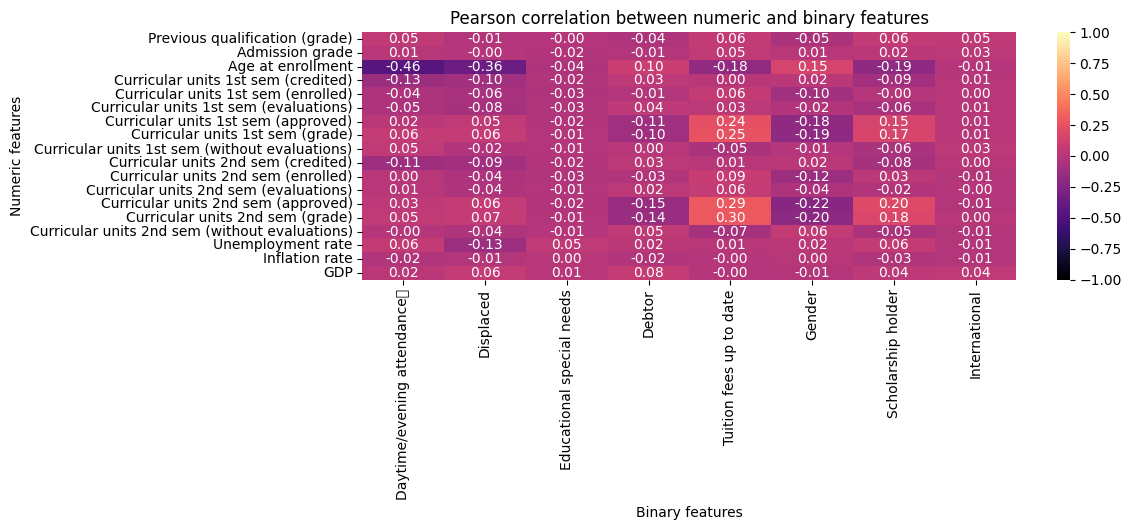

In [29]:
plt.figure(figsize=(12, max(4, len(numeric_cols) * 0.3)))
sns.heatmap(
    corr_num_bin,
    cmap="magma",
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,   # mete False se não quiseres os números escritos
    fmt=".2f",
    cbar=True
)
plt.title("Pearson correlation between numeric and binary features")
plt.xlabel("Binary features")
plt.ylabel("Numeric features")
plt.tight_layout()
plt.show()

C:\Users\magda.costa\AppData\Local\Temp\ipykernel_21004\2958826985.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\magda.costa\AppData\Local\Temp\ipykernel_21004\2958826985.py:34: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


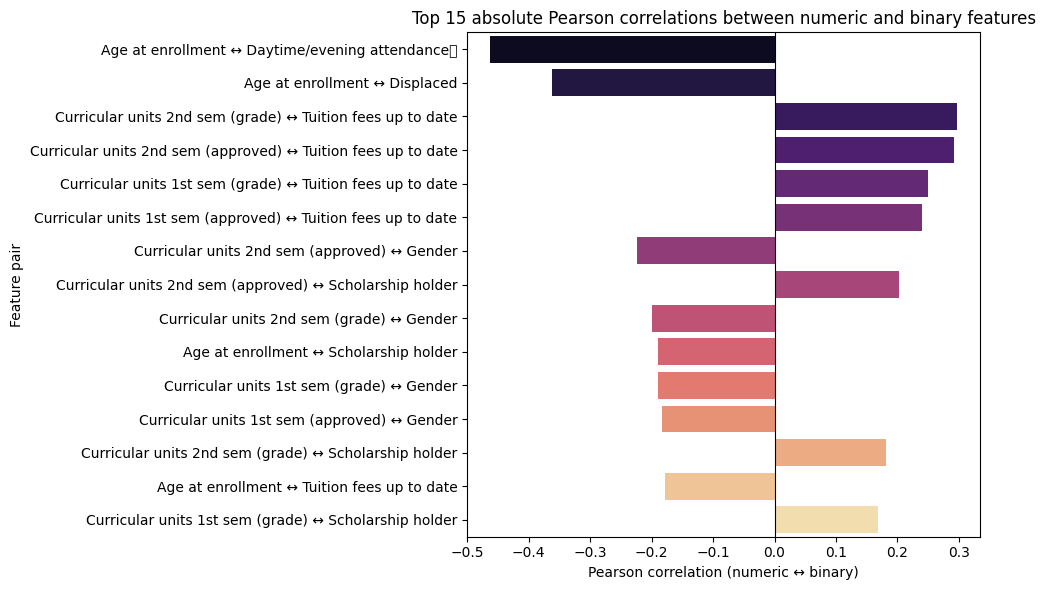

In [30]:
# 1) Put the matrix into long format: (numeric, binary, corr)
pairs_nb = (
    corr_num_bin
        .stack()                  # (numeric, binary) -> value
        .rename("corr")
        .to_frame()
        .reset_index()
)

pairs_nb.columns = ["numeric", "binary", "corr"]

# 2) Sort by absolute correlation
pairs_nb["abs_corr"] = pairs_nb["corr"].abs()
pairs_nb = pairs_nb.dropna(subset=["corr"])  # just in case

top_n = 15  # change if you want more/less
top_pairs_nb = pairs_nb.sort_values("abs_corr", ascending=False).head(top_n)

# 3) Create label "numeric ↔ binary" for plotting
top_pairs_nb["pair"] = top_pairs_nb["numeric"] + " ↔ " + top_pairs_nb["binary"]

# 4) Horizontal barplot
plt.figure(figsize=(10, max(4, top_n * 0.4)))
sns.barplot(
    data=top_pairs_nb,
    x="corr",
    y="pair",
    palette="magma"
)
plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Pearson correlation (numeric ↔ binary)")
plt.ylabel("Feature pair")
plt.title(f"Top {top_n} absolute Pearson correlations between numeric and binary features")
plt.tight_layout()
plt.show()

The numeric–binary relationships in the dataset appear weak to moderate at best, indicating that these binary variables do not exert strong linear influence on academic performance metrics. Instead, their impact is likely indirect or captured better by non-linear models.

---
---

# Principal Component Analysis (PCA) <a name = "pmt_pca"></a>
[[go back to Pre-Modelling Techniques]](#pmt)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a large set of possibly correlated variables into a smaller set of uncorrelated components called principal components, which capture most of the original data’s variability. You feed it correlated features, it produces component vectors (each a weighted combination of the original variables) and associated scores for every sample, along with the variance explained by each component. This helps compress data, de-noise it, and reveal dominant patterns while keeping most of the original information.


However, standard PCA is a linear method: it can only capture linear relationships between features. Since many of our variables exhibit non-linear and non-monotonic behaviour, we also apply Kernel PCA, which first maps the data into a higher-dimensional feature space using a kernel function and then performs PCA in that space. This allows us to capture more complex, non-linear structures in the data. We then compare the results of linear PCA and Kernel PCA in terms of variance explained and downstream performance, to assess whether modelling these non-linear relationships leads to a more informative representation of the feature space.

---

## Normal PCA <a name = "pmt_pca_normal"></a>
[[go back to PCA]](#pmt_pca)

Before we apply PCA on the dataset, we need to make sure that all the features are numerical and that they are normalized. 

In [31]:
"""
This code prepares numeric features for modelling by standardising them.
"""

target = "Target"  
X = data.drop(columns=[target])
y = data[target]

X_num = X.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

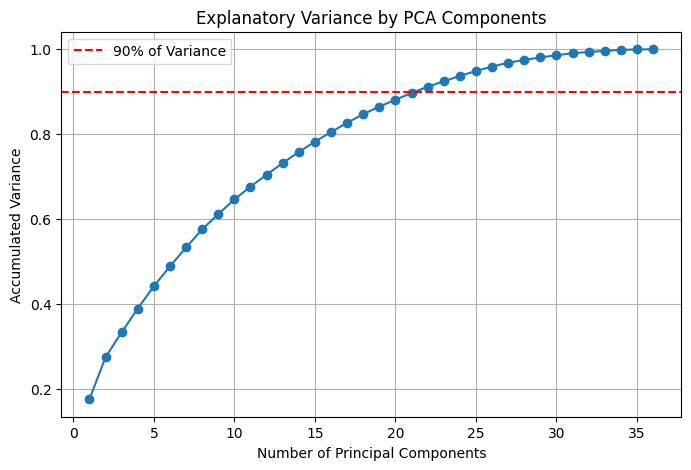

In [32]:
"""
This code applies PCA to the scaled features and plots how much variance is captured
as components are added.
"""

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance by component
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% of Variance')
plt.title("Explanatory Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accumulated Variance")
plt.legend()
plt.grid(True)
plt.show()

The graph shows that the first principal components explain most of the data’s variability, with around 20 components being enough to retain roughly 90% of the total variance. This indicates that the dataset contains redundant information and that dimensionality can be reduced significantly without losing much explanatory power.

In [33]:
"""
This code reduces the dimensionality of the scaled feature matrix using PCA.
"""

pca = PCA(n_components=21)
X_reduced = pca.fit_transform(X_scaled)

print(f"Original Form: {X_scaled.shape}")
print(f"After PCA: {X_reduced.shape}")

Original Form: (4424, 36)
After PCA: (4424, 21)


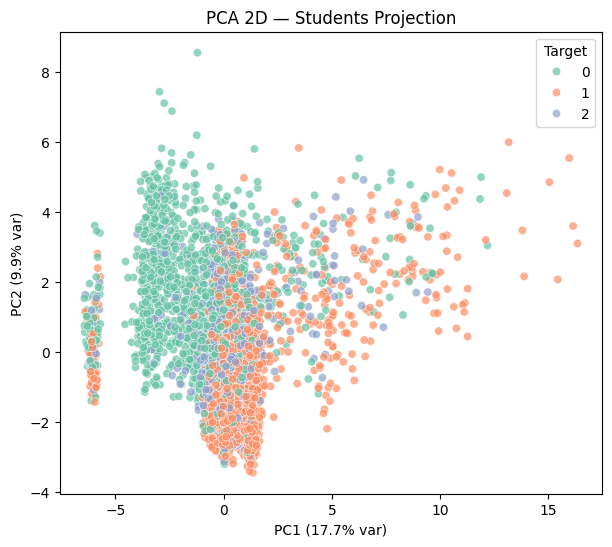

In [34]:
"""
This code projects the scaled data into two principal components and visualises
the result coloured by the target class.
"""

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
pca_df[target] = y.values

plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=target, palette='Set2', alpha=0.7)
plt.title("PCA 2D — Students Projection")
plt.xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% var)")
plt.legend(title=target)
plt.show()

PCA reveals that there are general patterns that distinguish Graduates and Dropouts, but there is no clear separation between all classes in the linear space of the first two components. This indicates that:
- The variability between classes is complex and multidimensional (not fully captured in 2D).
- More components or non-linear methods (such as t-SNE) may be needed to better visualize the separation.

In short, the graph shows a trend of partial separation, but also considerable overlap.

 Variables most contributing to PC1:


Curricular units 1st sem (enrolled)       0.358296
Curricular units 1st sem (approved)       0.356709
Curricular units 2nd sem (enrolled)       0.349060
Curricular units 2nd sem (approved)       0.334513
Curricular units 1st sem (evaluations)    0.299384
Curricular units 2nd sem (evaluations)    0.292199
Curricular units 1st sem (credited)       0.288022
Curricular units 2nd sem (credited)       0.287592
Curricular units 1st sem (grade)          0.255158
Curricular units 2nd sem (grade)          0.254296
Name: PC1, dtype: float64

c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


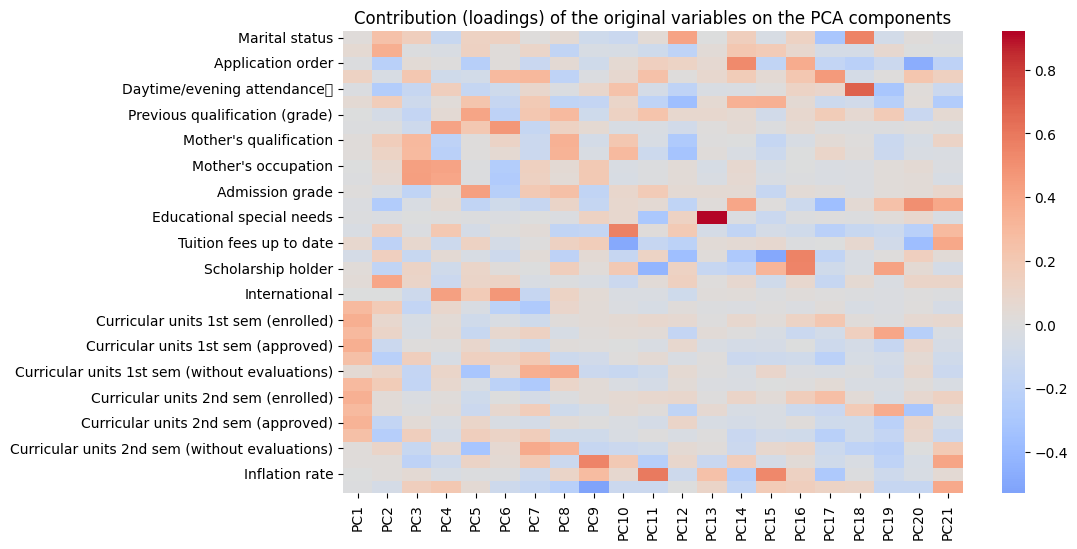

In [35]:
"""
This code inspects PCA loadings to understand how original features contribute to
each principal component.
"""

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X_num.columns
)

# Mostra as top variáveis mais influentes na 1ª componente
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(10)
print(" Variables most contributing to PC1:")
display(top_pc1)

# Heatmap de todas as componentes
plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", center=0)
plt.title("Contribution (loadings) of the original variables on the PCA components")
plt.show()

In [36]:
"""
This code summarises the most influential original features for the first five
PCA components and reports how much variance each of those components explains.
"""

components_to_summarize = [f"PC{i+1}" for i in range(5)]
top_features_per_pc = []
for component in components_to_summarize:
    coeffs = loadings[component].sort_values(key=np.abs, ascending=False).head(5)
    top_features_per_pc.append(pd.DataFrame({
        'Component': component,
        'Feature': coeffs.index,
        'Loading': coeffs.values
    }))
top_loadings_summary = pd.concat(top_features_per_pc, ignore_index=True)
display(top_loadings_summary)
variance_report = pd.Series(
    pca.explained_variance_ratio_[:len(components_to_summarize)],
    index=components_to_summarize
)
print('Explained variance ratio of first components:')
display(variance_report)

,Component,Feature,Loading
0,PC1,Curricular units 1st sem (enrolled),0.358296
1,PC1,Curricular units 1st sem (approved),0.356709
2,PC1,Curricular units 2nd sem (enrolled),0.349060
3,PC1,Curricular units 2nd sem (approved),0.334513
4,PC1,Curricular units 1st sem (evaluations),0.299384
5,PC2,Age at enrollment,0.403753
6,PC2,Application mode,0.358512
7,PC2,Displaced,-0.260839
8,PC2,Daytime/evening attendance\t,-0.250186
9,PC2,Marital status,0.250065


Explained variance ratio of first components:


PC1    0.176664
PC2    0.098870
PC3    0.058626
PC4    0.055853
PC5    0.052594
dtype: float64

The heatmap confirms that the PCA primarily captures students' academic behavior in the early components, as shown by PC1. This reinforces the idea that academic performance is the main differentiator within the dataset and that the early PCA components effectively synthesize this information.

In [37]:
"""
This code packages and saves the PCA-transformed dataset.
"""

pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
pca_features = pd.DataFrame(X_reduced, columns=pca_columns, index=data.index)
pca_features[target] = y.values
pca_output_path = "data_all_pca_21_components.csv"
pca_features.to_csv(pca_output_path, index=False)
print(f"Saved PCA dataset to {pca_output_path} with shape {pca_features.shape}")
pca_features.head()

Saved PCA dataset to data_all_pca_21_components.csv with shape (4424, 22)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Target
0,-6.101294,-0.296791,-1.428491,0.472800,-0.801264,-2.060714,-2.721872,0.628532,-0.250201,-1.355478,...,-0.194065,0.587353,-0.659589,0.468315,-2.309538,-0.343417,-0.785448,-1.431041,-0.460789,0
1,-0.254507,-1.106861,-1.841772,0.603317,1.205722,-0.779358,1.132180,-1.077095,-0.807876,0.819564,...,-0.317016,-0.174343,-1.708825,0.306600,0.193767,-0.117552,0.237376,2.169477,-0.232595,1
2,-3.954380,0.446635,0.007524,0.115662,-2.210973,-0.530667,-2.253659,0.451021,-0.717236,1.455800,...,0.042996,1.402511,-1.020635,1.983795,1.131953,-0.550380,-1.038827,0.882714,-0.422281,0
3,0.421885,-0.958326,0.884233,-1.041023,-0.816698,0.822866,-0.214387,0.478226,-0.254595,0.238949,...,-0.399031,0.862392,-1.147450,-1.411513,0.267168,0.123997,0.073968,0.412655,-0.570284,1
4,0.405696,2.791055,1.898494,-1.976661,1.296870,1.376717,-0.428059,-0.231268,-0.311194,-1.446288,...,-0.440515,0.301884,-0.861904,-1.085220,-0.787346,-1.109283,-0.626915,0.111079,0.696457,1


---

## Kernel PCA <a name = "pmt_pca_kernel"></a>
[[go back to PCA]](#pmt_pca)

Our dataset has variables with non-linear and non-monotonic relationships, standard (linear) PCA is very limited. Linear PCA can only capture linear variance, so if the data structure is curved (e.g. U-shape, rings, S-shape), PCA will not represent it well and may treat that structure as noise.

KernelPCA fixes this by first applying a kernel function (e.g. RBF, polynomial) that implicitly maps the data into a higher-dimensional feature space. In that space, complex non-linear patterns can become more linearly separable. Then PCA is performed in this transformed space.

As a result:
- KernelPCA can capture non-linear structures in the data.
- The first components reflect the true geometry of the data better than linear PCA.
- For datasets where many relationships are clearly non-linear/non-monotonic, KernelPCA often provides a more informative low-dimensional representation than standard PCA.

So in your case, with non-linear and non-monotonic variables, KernelPCA can be conceptually a better fit than normal PCA.

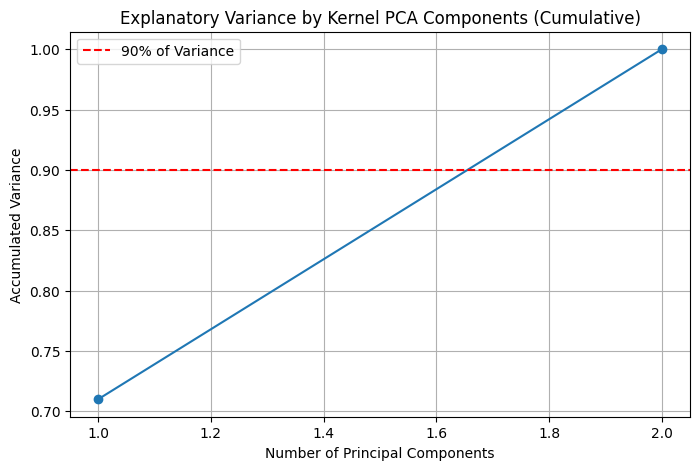

In [38]:
kpca = KernelPCA(
    n_components=2,
    kernel="rbf",
    gamma=0.05,
    fit_inverse_transform=False,
    random_state=0,
)
X_kpca = kpca.fit_transform(X_scaled)

# pegar autovalores de forma compatível
eigs = getattr(kpca, "lambdas_", None)
if eigs is None:
    eigs = getattr(kpca, "eigenvalues_", None)
    if eigs is None:
        raise AttributeError("KernelPCA não retornou autovalores (lambdas_/eigenvalues_).")

explained_var = eigs / eigs.sum()
explained_var_cum = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_cum) + 1), explained_var_cum, marker="o")
plt.axhline(y=0.9, color="r", linestyle="--", label="90% of Variance")
plt.title("Explanatory Variance by Kernel PCA Components (Cumulative)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accumulated Variance")
plt.legend()
plt.grid(True)
plt.show()

The cumulative variance plot shows that the first two Kernel PCA components capture almost 100% of the total variance in the transformed feature space. While the first component explains around 70%, adding the second component pushes the cumulative variance well above the 90% threshold, commonly used in dimensionality-reduction criteria. This indicates that a two-component Kernel PCA projection is sufficient to retain nearly all relevant information. The result also suggests the presence of non-linear structure in the dataset, as only two non-linear components are required to capture patterns that linear PCA would typically distribute across multiple components.

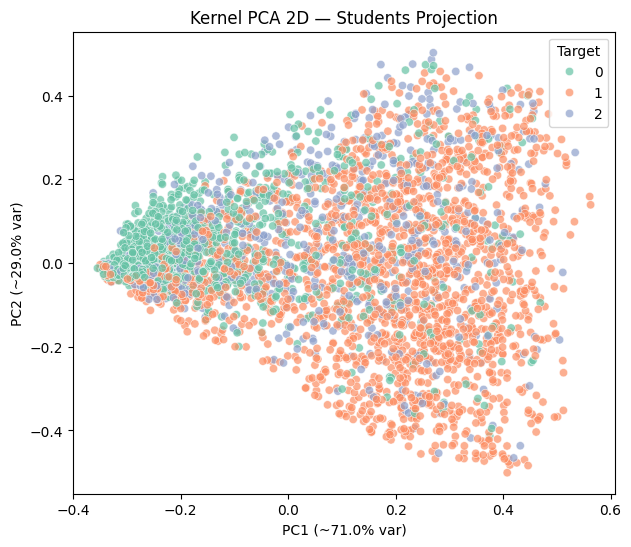

In [39]:
kpca_2d = KernelPCA(n_components=2, kernel="rbf", gamma=0.05, random_state=0)
X_2d = kpca_2d.fit_transform(X_scaled)

# autovalores (lambda) para proxy de variância explicada
eigs = getattr(kpca_2d, "lambdas_", None) or getattr(kpca_2d, "eigenvalues_", None)
if eigs is None:
    raise AttributeError("KernelPCA não retornou autovalores (lambdas_/eigenvalues_).")
ratio = eigs / eigs.sum()

kpca_df = pd.DataFrame(X_2d, columns=["PC1", "PC2"])
kpca_df[target] = y.values

plt.figure(figsize=(7, 6))
sns.scatterplot(data=kpca_df, x="PC1", y="PC2", hue=target, palette="Set2", alpha=0.7)
plt.title("Kernel PCA 2D — Students Projection")
plt.xlabel(f"PC1 (~{ratio[0]*100:.1f}% var)")
plt.ylabel(f"PC2 (~{ratio[1]*100:.1f}% var)")
plt.legend(title=target)
plt.show()

The Kernel PCA projection reveals a more structured, non-linear separation among the classes compared with the linear PCA, although considerable overlap remains, particularly between classes 1 and 2. Class 0 forms a relatively compact cluster on the left side of the plot, while classes 1 and 2 are more interwoven, reflecting the complex nature of academic performance patterns. The first non-linear component explains the majority of the variance, with the second component completing almost the full representation. The curved, fan-shaped geometry of the projection indicates the presence of non-linear relationships in the dataset, which Kernel PCA is able to unfold. Class 2 appears dispersed across the space, suggesting it represents a heterogeneous group, likely to be harder to separate with linear models.

Variables most correlated com PC1 (proxy):


Age at enrollment                      0.528387
Curricular units 2nd sem (grade)       0.480032
Curricular units 1st sem (grade)       0.458609
Application mode                       0.436674
Curricular units 2nd sem (approved)    0.433963
Curricular units 1st sem (approved)    0.403304
Previous qualification                 0.341758
Tuition fees up to date                0.338763
Marital status                         0.326081
Displaced                              0.324426
Name: PC1, dtype: float64

c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\magda.costa\MIA\TAAC\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


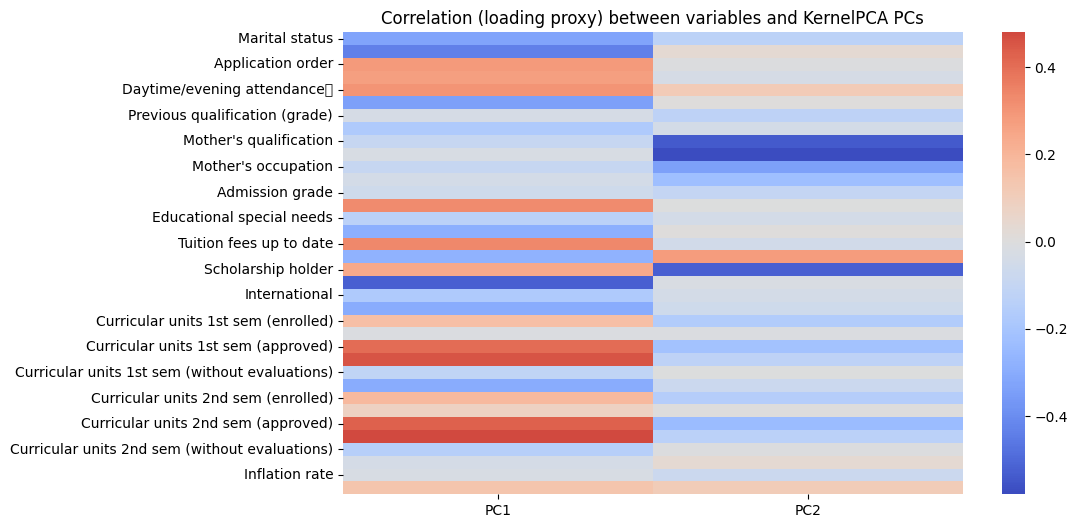

In [40]:
comp_df = pd.DataFrame(X_2d, columns=[f"PC{i+1}" for i in range(X_2d.shape[1])])
proxy = pd.DataFrame(index=X_num.columns, columns=comp_df.columns)
for pc in comp_df.columns:
    proxy[pc] = X_num.apply(lambda col: col.corr(comp_df[pc], method="spearman"))
top_pc1 = proxy["PC1"].abs().sort_values(ascending=False).head(10)
print("Variables most correlated com PC1 (proxy):")
display(top_pc1)

plt.figure(figsize=(10,6))
sns.heatmap(proxy, cmap="coolwarm", center=0)
plt.title("Correlation (loading proxy) between variables and KernelPCA PCs")
plt.show()

**PC1 (≈70% variance)**

PC1 shows strong correlations with academic performance variables such as the number of approved curricular units, grades, enrolment levels, tuition fee status, and scholarship status. This indicates that PC1 captures a non-linear dimension combining academic achievement, engagement, and administrative stability. The positive and negative correlations with these indicators suggest that this component represents the main axis of academic progress within the dataset.

**PC2 (≈30% variance)**

PC2 is primarily associated with socio-demographic variables, including parents’ educational levels, international status, and aspects linked to students’ economic background. This component therefore appears to reflect underlying socio-economic and family-related factors that influence students’ academic pathways in a more indirect manner.

**Overall interpretation**

Together, the Kernel PCA components effectively disentangle two major non-linear structures in the data: a dominant academic-performance axis (PC1) and a socio-demographic background axis (PC2). This separation aligns with what would be expected in educational data, and highlights the advantage of Kernel PCA in uncovering non-linear relationships that are not captured by linear PCA.

---

# t-distributed Stochastic Neighbot Embedding (t-SNE) <a name = "pmt_tsne"></a>
[[go back to Pre-Modelling Techniques]](#pmt)

t-SNE is a nonlinear dimensionality-reduction method that projects high-dimensional data onto 2 or 3 dimensions while preserving local neighborhood structure. Unlike PCA, which preserves global variance linearly, t-SNE focuses on preserving local structure, meaning that points that are close together in the original space remain close in the visualisation. It works by converting pairwise distances into probabilities that reflect how likely points are to be neighbors, then optimizing a low-dimensional embedding whose neighbor probabilities match the original (using a heavy-tailed Student-t distribution to prevent crowding). t-SNE is particularly useful for:
- Visualising clusters and patterns in complex datasets.
- Exploring class separability in classification problems.
- Identifying outliers or sub-groups not captured by linear methods like PCA.

## Normal t-SNE <a name = "pmt_tsne_normal"></a>
[[go back to t-SNE]](#pmt_tsne)

Below we visualize the projection provided by t-SNE onto the standardized data. This non-linear method helps to identify clusters that linear PCA may not capture.

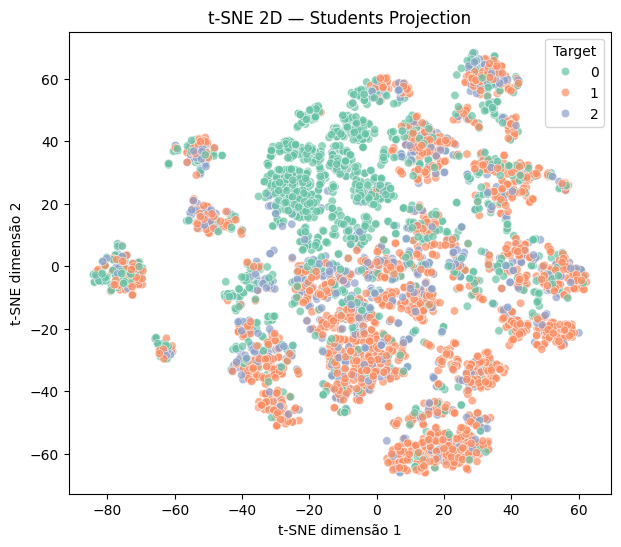

In [41]:
"""
This code runs t-SNE to create a 2D non-linear embedding of the scaled features
and visualises the result coloured by the target class.
"""

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    random_state=42,
)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df[target] = y.values

plt.figure(figsize=(7, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue=target, palette='Set2', alpha=0.7)
plt.title('t-SNE 2D — Students Projection')
plt.xlabel('t-SNE dimensão 1')
plt.ylabel('t-SNE dimensão 2')
plt.legend(title=target, loc='best')
plt.show()

Note: 
      `0 - Dropout`, 
      `1 - Graduate`, 
      `2 - Enrolled`

The t-SNE reveals a non-linear structure in the data, the classes are not entirely separated, but there are local patterns and distinct groups, especially among Graduates and Dropouts.
This suggests that academic behavior and student progress are associated with complex, multidimensional characteristics, which t-SNE can capture better than linear methods such as PCA.

To study the balance between local and global structure, we decided to compare different combinations of perplexity and learning rate: 
- Lower perplexity values emphasize very close neighborhoods, while higher values aim to preserve global relationships
- The learning rate controls the speed of updates during optimization.

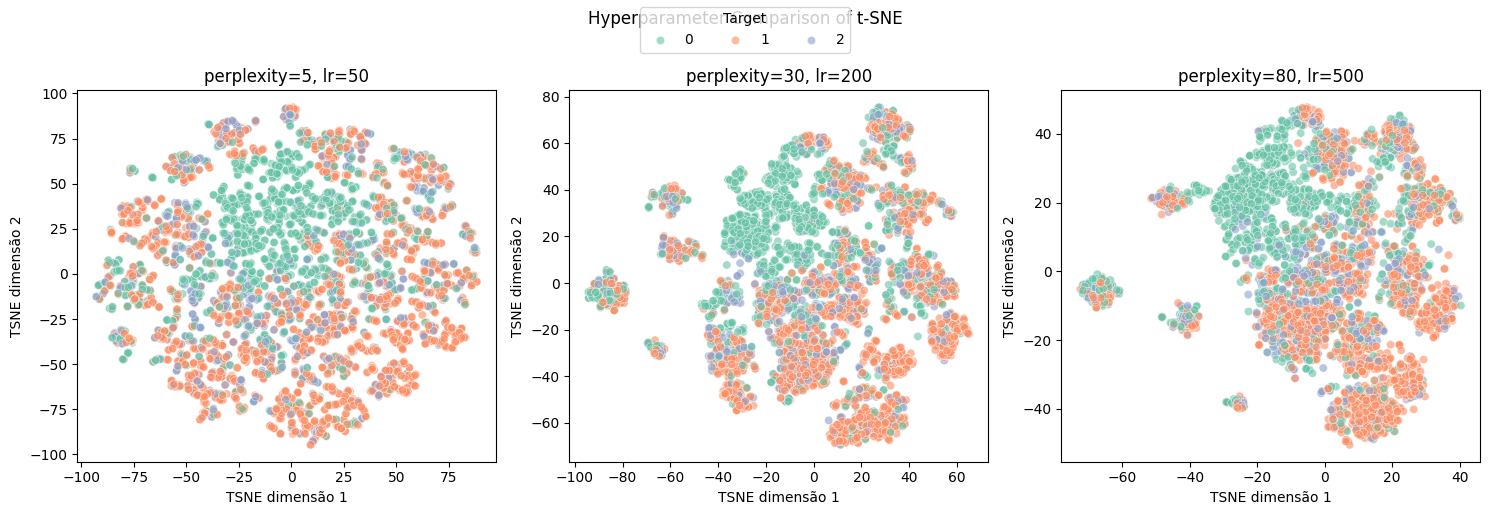

In [42]:
"""
This code compares t-SNE embeddings under different hyperparameters and plots them side by side.
"""

tsne_configs = [
    {'perplexity': 5, 'learning_rate': 50},
    {'perplexity': 30, 'learning_rate': 200},
    {'perplexity': 80, 'learning_rate': 500},
]

fig, axes = plt.subplots(1, len(tsne_configs), figsize=(5 * len(tsne_configs), 5), sharex=False, sharey=False)
if len(tsne_configs) == 1:
    axes = [axes]

for ax, cfg in zip(axes, tsne_configs):
    tsne = TSNE(
        n_components=2,
        perplexity=cfg['perplexity'],
        learning_rate=cfg['learning_rate'],
        init='pca',
        random_state=42,
    )
    embedding = tsne.fit_transform(X_scaled)
    tsne_df = pd.DataFrame(embedding, columns=['TSNE1', 'TSNE2'])
    tsne_df[target] = y.values

    sns.scatterplot(
        data=tsne_df,
        x='TSNE1',
        y='TSNE2',
        hue=target,
        palette='Set2',
        alpha=0.6,
        ax=ax,
    )
    ax.set_title('perplexity={0}, lr={1}'.format(cfg['perplexity'], cfg['learning_rate']))
    ax.set_xlabel('TSNE dimensão 1')
    ax.set_ylabel('TSNE dimensão 2')
    ax.legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels), title=target)
fig.suptitle('Hyperparameter Comparison of t-SNE', y=1.02)
plt.tight_layout()
plt.show()

`Scenario 1:`
The graph is more scattered and noisy, with many overlapping points and poorly defined clusters. The low perplexity causes the algorithm to focus too much on very close neighbors, which tends to create unstable patterns and less interpretable groupings, resulting in an unclear structure with poorly separated classes.

`Scenario 2:` 
Here, the visual separation between the groups is more precise, especially between Dropouts (0) and Graduates (1). The average perplexity balances the focus well between local and global structure, resulting in more defined and coherent clusters. However, Enrolled (2) remains somewhat dispersed.

`Scenario 3:` 
Excessive perplexity causes t-SNE to smooth the structure, attempting to preserve global relationships, thereby reducing the definition of local clusters. The groups are still visible, but less compact and more overlapping, especially between classes 1 (Graduate) and 2 (Enrolled).

## t-SNE with Kernel PCA <a name = "pmt_tsne_kernel_pca"></a>
[[go back to t-SNE]](#pmt_tsne)

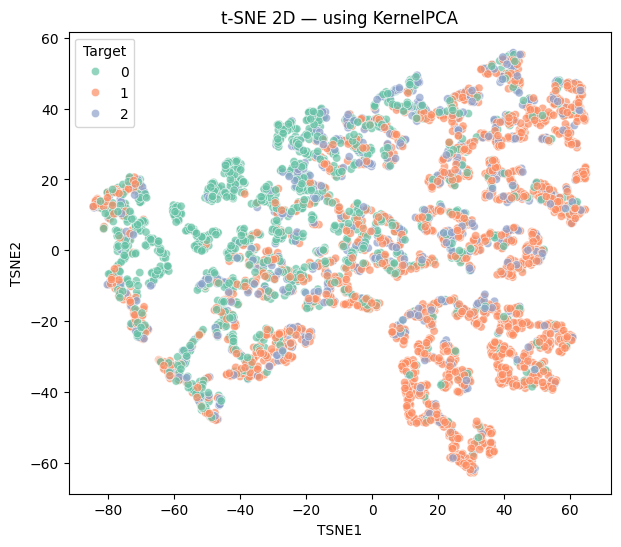

In [43]:
# 4) t-SNE usando as PCs do KernelPCA
X_kpca_only = kpca_df.drop(columns=[target_col])
tsne = TSNE(n_components=2, perplexity=30, learning_rate="auto", init="pca", random_state=42)
X_tsne_kpca = tsne.fit_transform(X_kpca_only)

tsne_kpca_df = pd.DataFrame(X_tsne_kpca, columns=["TSNE1", "TSNE2"], index=X_kpca_only.index)
tsne_kpca_df[target_col] = kpca_df[target_col].values

plt.figure(figsize=(7, 6))
sns.scatterplot(data=tsne_kpca_df, x="TSNE1", y="TSNE2", hue=target_col, palette="Set2", alpha=0.7)
plt.title("t-SNE 2D — using KernelPCA")
plt.show()

t-SNE on the original data produces multiple compact local clusters, reflecting the algorithm’s focus on preserving neighbourhood structure. Class 0 forms several dense groups, while class 1 is more widely dispersed across the space, and class 2 appears scattered, confirming its heterogeneous nature. Although the plot reveals meaningful local structure, the separation between classes remains partial, with substantial overlap, particularly between classes 1 and 2.

When t-SNE is applied to the two Kernel PCA components, the resulting embedding becomes more organised and more consistent with the global non-linear structure captured by the Kernel PCA. The classes separate more clearly along a continuous, elongated manifold, with class 0 forming a cohesive region and class 1 occupying distinct contiguous areas rather than fragmented clusters. Class 2 remains the most diffuse group, but its distribution becomes more structured compared with the original t-SNE plot.

Overall, using Kernel PCA before t-SNE improves the global separability of the classes and produces a more coherent embedding, as the Kernel PCA removes high-dimensional noise and captures the main non-linear variations before the t-SNE refines the local neighbourhoods.

---

## Prototypes & Criticisms via MMD <a name = "pmt_pc"></a>
[[go back to Pre-Modelling Techniques]](#pmt)

Maximum Mean Discrepancy (MMD) gives us a kernel-based way to summarise the dataset with representative examples (prototypes) and to highlight under-represented, atypical points (criticisms). The plot below projects the full dataset to two principal components and overlays the selected samples.

Protypes and Criticisms is an explainable data summarization technique that uses ab MMD (Maximum Mean Discrepancy)-based algorithm to select a small number of prototypes - the most representative students that best captures the overall distribution, and criticisms - students. that differ from the main trends or highlight regions of the data the prototypes fail to represent well. 

In [44]:
"""Utilities to extract prototypes and criticisms with Maximum Mean Discrepancy.

This module implements the greedy selection strategy proposed in:
  "Examples are not Enough, Learn to Criticize! Criticism for Interpretability"
  (Been Kim, Rajiv Khanna, Oluwasanmi Koyejo, 2016).
"""

@dataclass
class MMDSelectionResult:
    """Indices for the selected prototypes and criticisms."""

    prototypes: List[int]
    criticisms: List[int]


def _kernel_matrix(
    X: np.ndarray,
    kernel: str = "rbf",
    gamma: float | None = None,
) -> np.ndarray:
    """Build the kernel matrix for the dataset."""
    params = {"metric": kernel}
    if gamma is not None:
        params["gamma"] = gamma
    return pairwise_kernels(X, **params)


def _select_prototypes_from_kernel(
    K: np.ndarray,
    m: int,
) -> List[int]:
    """Greedy selection of prototypes that minimise the MMD to the full dataset."""
    n = K.shape[0]
    if m <= 0 or m > n:
        raise ValueError("`m` must be between 1 and the number of samples.")

    selected: List[int] = []
    selected_set: set[int] = set()
    kernel_row_sums = K.sum(axis=1)
    dataset_size = float(n)
    sum_K_S = 0.0  # Sum of kernel values between selected elements and the dataset.
    sum_KSS = 0.0  # Sum of kernel values between selected elements.

    for t in range(m):
        best_idx = -1
        best_score = -np.inf
        best_sum_K_S_new = None
        best_sum_KSS_new = None

        denom_ds = dataset_size * (t + 1)
        denom_ss = float((t + 1) ** 2)

        for i in range(n):
            if i in selected_set:
                continue
            sum_K_S_new = sum_K_S + kernel_row_sums[i]
            cross_term = 0.0 if not selected else float(K[i, selected].sum())
            sum_KSS_new = sum_KSS + K[i, i] + 2.0 * cross_term

            score = (2.0 / denom_ds) * sum_K_S_new - (1.0 / denom_ss) * sum_KSS_new
            if score > best_score:
                best_score = score
                best_idx = i
                best_sum_K_S_new = sum_K_S_new
                best_sum_KSS_new = sum_KSS_new

        selected.append(best_idx)
        selected_set.add(best_idx)
        sum_K_S = best_sum_K_S_new  # type: ignore[assignment]
        sum_KSS = best_sum_KSS_new  # type: ignore[assignment]

    return selected


def _select_criticisms_from_kernel(
    K: np.ndarray,
    prototype_indices: Sequence[int],
    n_criticisms: int,
    regularization: float = 1e-6,
) -> List[int]:
    """Pick the data points with the largest witness function values."""
    n = K.shape[0]
    available = sorted(set(range(n)) - set(prototype_indices))
    if n_criticisms <= 0:
        return []
    if not available:
        raise ValueError("No candidates left to choose criticisms from.")

    kernel_mean = K.mean(axis=1)
    proto_kernel = K[:, prototype_indices] if prototype_indices else np.zeros((n, 0))
    proto_mean = proto_kernel.mean(axis=1) if prototype_indices else np.zeros(n)
    witness = kernel_mean - proto_mean

    scores = witness[available] ** 2 / (regularization + np.diag(K)[available])
    ordering = np.argsort(scores)[::-1]

    selected = [available[i] for i in ordering[:n_criticisms]]
    return selected


def select_mmd_prototypes_and_criticisms(
    X: np.ndarray,
    n_prototypes: int,
    n_criticisms: int,
    kernel: str = "rbf",
    gamma: float | None = None,
    regularization: float = 1e-6,
) -> MMDSelectionResult:
    """Select prototypes and criticisms using the MMD objective.

    Parameters
    ----------
    X:
        Input matrix with shape (n_samples, n_features).
    n_prototypes:
        Number of prototypes to select.
    n_criticisms:
        Number of criticisms to select.
    kernel:
        Any kernel supported by ``sklearn.metrics.pairwise_kernels`` (default ``rbf``).
    gamma:
        Optional gamma parameter for kernels such as RBF.
    regularization:
        Stabilises the criticism scoring; must be > 0.
    """
    if X.ndim != 2:
        raise ValueError("`X` must be a 2D array.")

    K = _kernel_matrix(X, kernel=kernel, gamma=gamma)
    proto_indices = _select_prototypes_from_kernel(K, n_prototypes)
    criticism_indices = _select_criticisms_from_kernel(
        K,
        proto_indices,
        n_criticisms=n_criticisms,
        regularization=regularization,
    )
    return MMDSelectionResult(prototypes=proto_indices, criticisms=criticism_indices)

In [45]:
# Prepare feature matrix
features = data.copy()
features.columns = features.columns.str.strip()
feature_cols = [col for col in features.columns if col != "Target"]
X = features[feature_cols].to_numpy(dtype=float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selection = select_mmd_prototypes_and_criticisms(
    X_scaled,
    n_prototypes=10,
    n_criticisms=5,
    kernel="rbf",
    gamma=None,
    regularization=1e-6,
)

prototypes_df = features.iloc[selection.prototypes].assign(kind="Prototype")
criticisms_df = features.iloc[selection.criticisms].assign(kind="Criticism")

display(prototypes_df)
display(criticisms_df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,kind
46,1,17,2,9238,1,1,130.0,1,19,19,...,6,8,5,13.200000,0,11.1,0.6,2.02,1,Prototype
2234,1,17,2,9254,1,1,118.0,1,19,19,...,6,9,4,12.000000,0,15.5,2.8,-4.06,2,Prototype
1547,2,39,1,9991,0,9,133.1,1,34,34,...,5,5,0,0.000000,0,7.6,2.6,0.32,0,Prototype
3222,1,1,1,9670,1,1,157.0,1,19,38,...,6,7,6,14.714286,0,11.1,0.6,2.02,1,Prototype
1303,1,51,1,9670,1,1,126.0,1,3,3,...,8,9,8,13.333333,0,11.1,0.6,2.02,1,Prototype
510,1,1,2,9070,1,1,121.0,1,4,1,...,6,9,0,0.000000,0,9.4,-0.8,-3.12,2,Prototype
1257,1,1,3,9556,1,1,132.0,1,38,37,...,8,8,8,13.800000,0,12.7,3.7,-1.70,1,Prototype
3512,1,1,1,171,1,1,140.0,1,19,19,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,Prototype
699,1,43,1,9119,1,1,140.0,1,37,38,...,5,11,1,17.000000,0,13.9,-0.3,0.79,0,Prototype
4121,1,7,1,9085,1,40,130.0,1,1,1,...,6,7,6,16.285714,0,11.1,0.6,2.02,1,Prototype


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,kind
1199,1,7,1,9085,1,40,140.0,1,1,19,...,6,8,6,16.375,0,12.4,0.5,1.79,1,Criticism
1688,1,1,1,171,1,1,124.0,1,19,1,...,0,0,0,0.000,0,10.8,1.4,1.74,2,Criticism
1452,1,1,1,171,1,1,132.0,1,1,1,...,0,0,0,0.000,0,10.8,1.4,1.74,0,Criticism
1883,1,1,1,171,1,1,145.0,1,1,19,...,0,0,0,0.000,0,10.8,1.4,1.74,1,Criticism
3825,1,1,1,171,1,1,130.0,1,1,38,...,0,0,0,0.000,0,11.1,0.6,2.02,0,Criticism


To make the results interpretable, let us embed the entire dataset into a two-dimensional space using t-SNE, and then visually marks of the protypes and criticisms against all other students. 

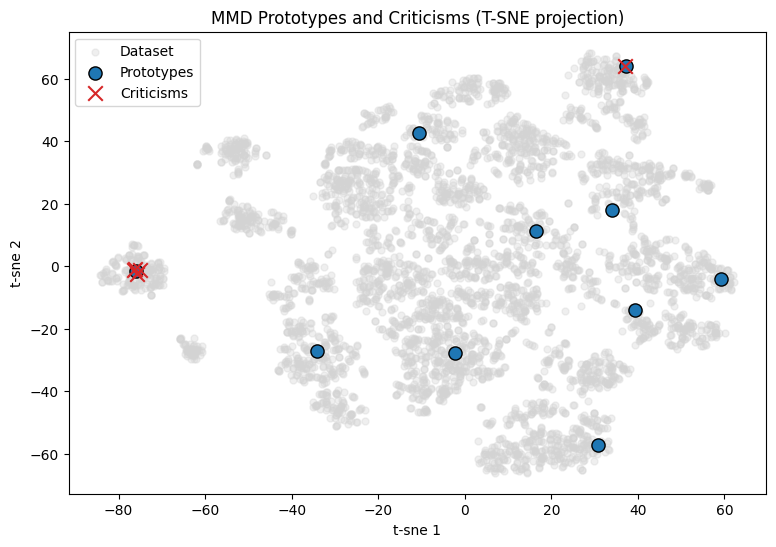

In [46]:
coords = tsne.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(coords[:, 0], coords[:, 1], color="lightgrey", alpha=0.35, s=25, label="Dataset")
ax.scatter(
    coords[selection.prototypes, 0],
    coords[selection.prototypes, 1],
    color="tab:blue",
    edgecolor="black",
    s=90,
    label="Prototypes",
)
ax.scatter(
    coords[selection.criticisms, 0],
    coords[selection.criticisms, 1],
    color="tab:red",
    marker="x",
    s=110,
    label="Criticisms",
)
ax.set_title("MMD Prototypes and Criticisms (T-SNE projection)")
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.legend(frameon=True, loc="best")
plt.show()

In the t-SNE visualization, grey points represent all students, blue points correspond to prototypes (the most representative cases that capture the main patterns in the data) and red crosses mark criticisms (students that differ from these typical patterns).

The prototypes are well distributed across the main clusters, indicating that they effectively summarize the diversity of student profiles in terms of academic performance and background.

Criticisms, positioned near the edges or in sparse regions, reveal atypical or underrepresented cases, such as students with unusual academic trajectories or socio-economic conditions.

This analysis enhances explainability by highlighting which examples define the overall population and which expose exceptions that might challenge or refine the predictive model.

---

## Pre-Modelling Techniques - Conclusion <a name = "pmt_c"></a>
[[go back to Pre-Modelling Techniques]](#pmt)

Through data analysis, we are able to take **two very importante conclusions:**


**1. The models will struggle to differentiate the "Enrolled" class from the other classes, which introduces noise into the dataset.**

**2. Some features are clearly relevant for assisting the model's predictions, such as student grades, while others may be irrelevant.**

Given this conclusions we decided to retain all the features in the dataset, as even seemingly irrelevant data may reveal unexpected relationships that could aid the model. Additionally, as we conduct further explainable AI (XAI) analyses, we will be able to verify our assumptions.

Our detailed analysis of the dataset, including its intended purpose, suggests that this label does not help solve the primary problem for which the dataset was created: reducing academic dropout and failure in higher education by using machine learning techniques to identify at-risk students early in their academic journey. Our primary interest is in whether students complete their studies, as simply being enrolled does not guarantee completion. Moreover, we lack information about the students' outcomes after the data was collected, making it difficult to determine the implications of the "Enrolled" status.

Since there is no clear distinction between "Enrolled" instances and the other classes, we will implement two approaches: one utilizing the complete dataset, and another excluding the "Enrolled" instances. We will assess, using transparent models, whether the "Enrolled" label introduces the anticipated noise into the data. We expect that the model trained without these instances will yield significantly better results.

Finally, we will briefly analyze the data without the Enrolled instances to confirm whether excluding this label actually improves the results obtained in the XAI pre-modeling techniques.